In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple

import corner


In [ ]:
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.training.trainer import Trainer

from starccato_flow.utils.defaults import TEN_KPC
from starccato_flow.plotting.plotting import plot_reconstruction_distribution, plot_candidate_signal, create_latent_morph_gif

/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


MPS device found


/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from starccato_flow.utils.defaults import DEVICE

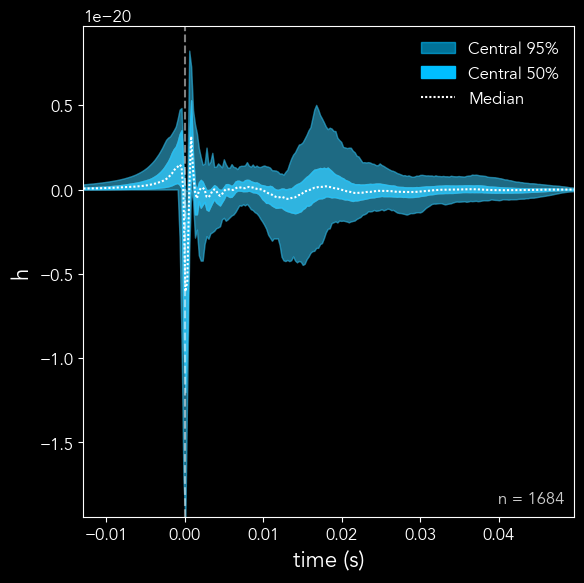

In [ ]:
ccsn_dataset = CCSNData(noise=True, curriculum=False)
ccsn_dataset.plot_signal_distribution(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_distribution.svg")

In [5]:
# ccsn_dataset.plot_signal_grid(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_grid.png")


=== Data Split (on base signals) ===
Total base signals: 1684
Training base signals: 1516
Validation base signals: 168
First 5 training indices: [ 360  336   81  684 1374]
First 5 validation indices: [722 519 222  32 111]
✓ Verification PASSED: No overlap between train and validation sets
  Train signals: 1516 unique indices
  Val signals: 168 unique indices
  Total coverage: 1684 / 1684

Verifying data alignment:
Number of signals: 1516
Number of parameter sets: 1516
Parameter columns: ['beta1_IC_b', 'omega_0(rad|s)', 'A(km)', 'Ye_c_b']
First few parameter values:
      beta1_IC_b  omega_0(rad|s)  A(km)   Ye_c_b
369     0.144352             8.5    467  0.26472
345     0.121586            10.0    300  0.26472
84      0.172129            12.5    300  0.27792
708     0.001442             1.0    300  0.28282
1447    0.047885             4.0    634  0.28170

Verifying data alignment:
Number of signals: 168
Number of parameter sets: 168
Parameter columns: ['beta1_IC_b', 'omega_0(rad|s)', '

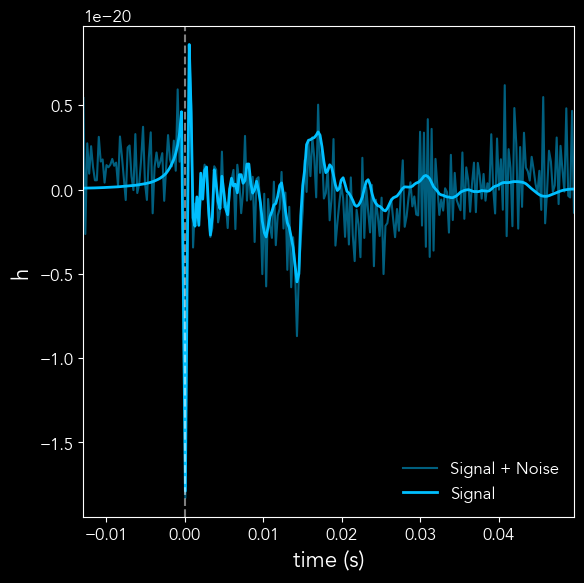

In [6]:
trainer = Trainer(
    toy=False, 
    start_snr=200,
    end_snr=10,
    noise=True, 
    validation_split=0.1,
    curriculum=True,
    noise_realizations=1
)

trainer.plot_candidate_signal(
    snr=30,
    index=60,
    background="black",
    fname="plots/ccsn_candidate_signal.png"
)

Epochs:   6%|▌         | 15/256 [00:33<08:34,  2.13s/it]

Generated signals shape: (32, 256)


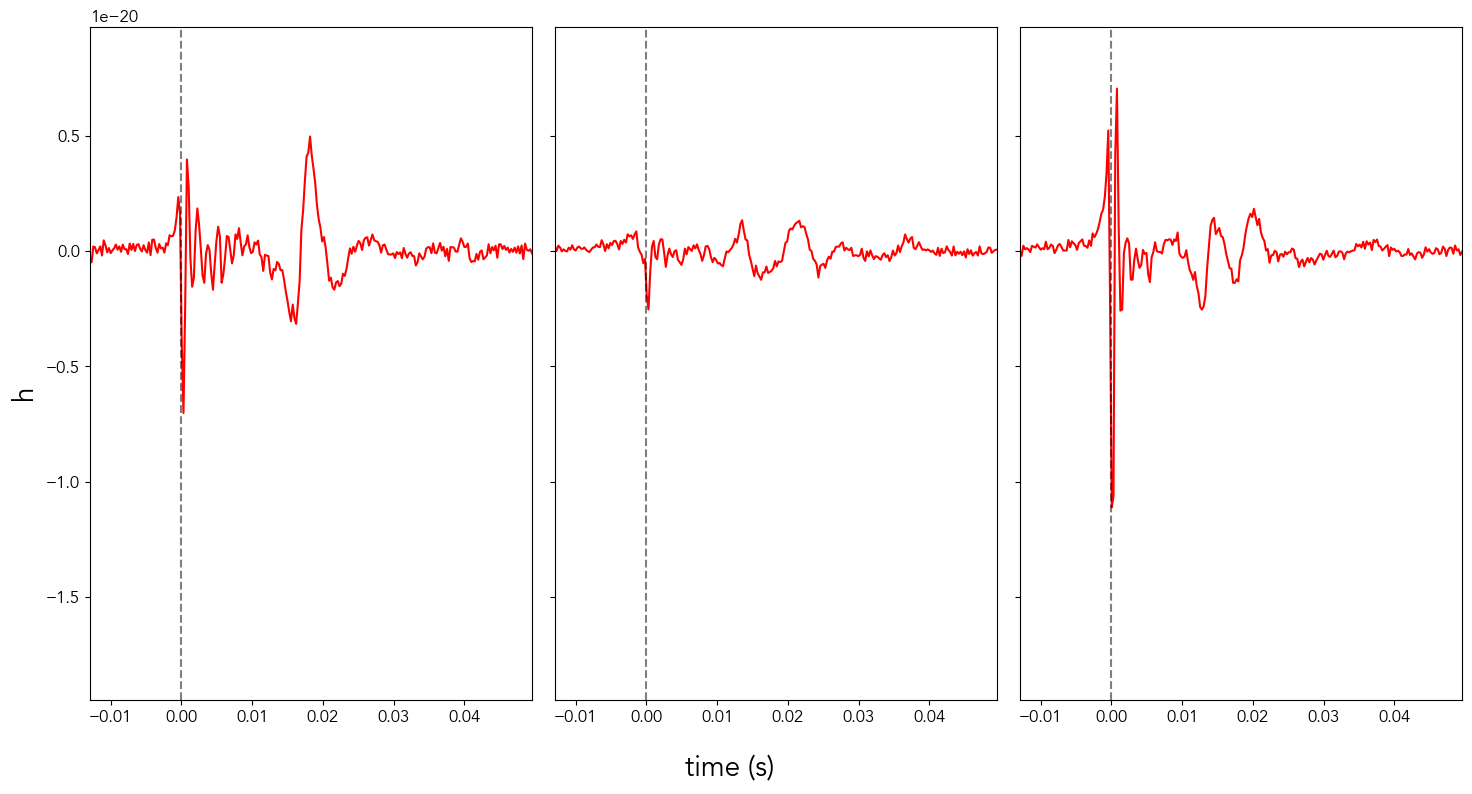

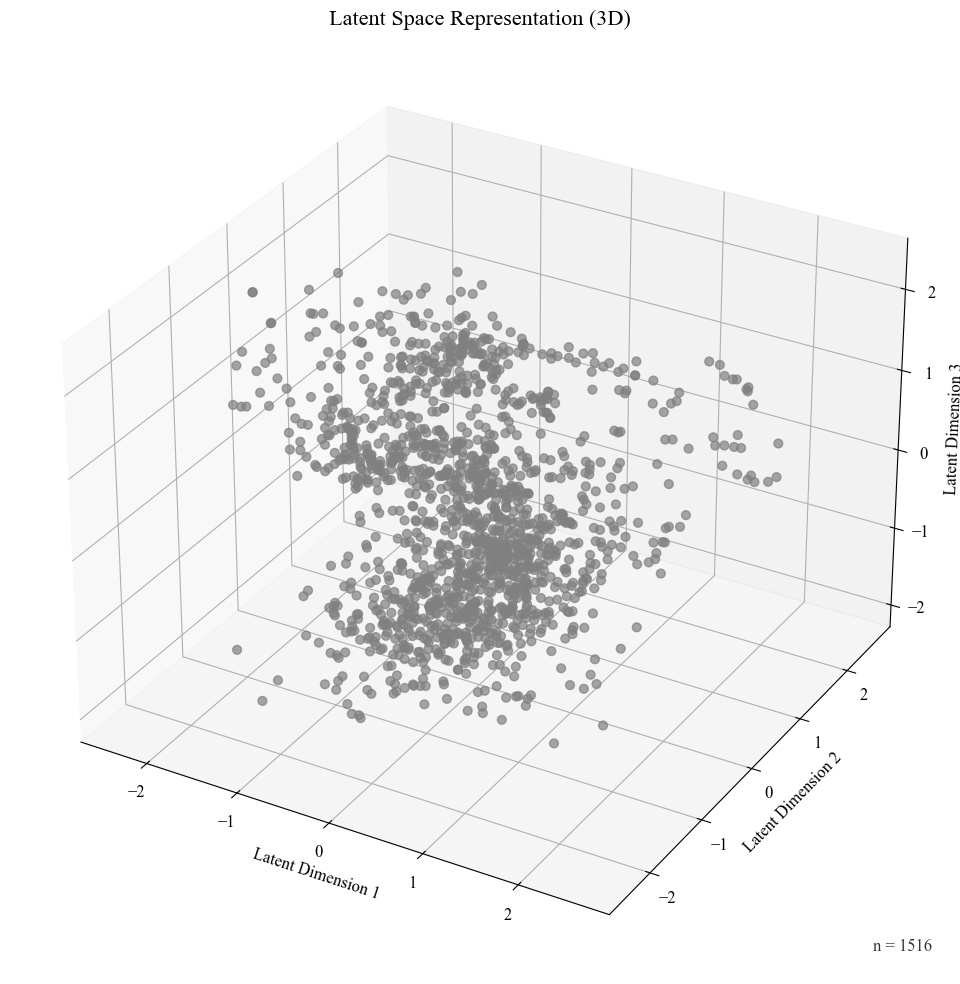

Epochs:  12%|█▏        | 31/256 [01:12<08:16,  2.21s/it]

Generated signals shape: (32, 256)


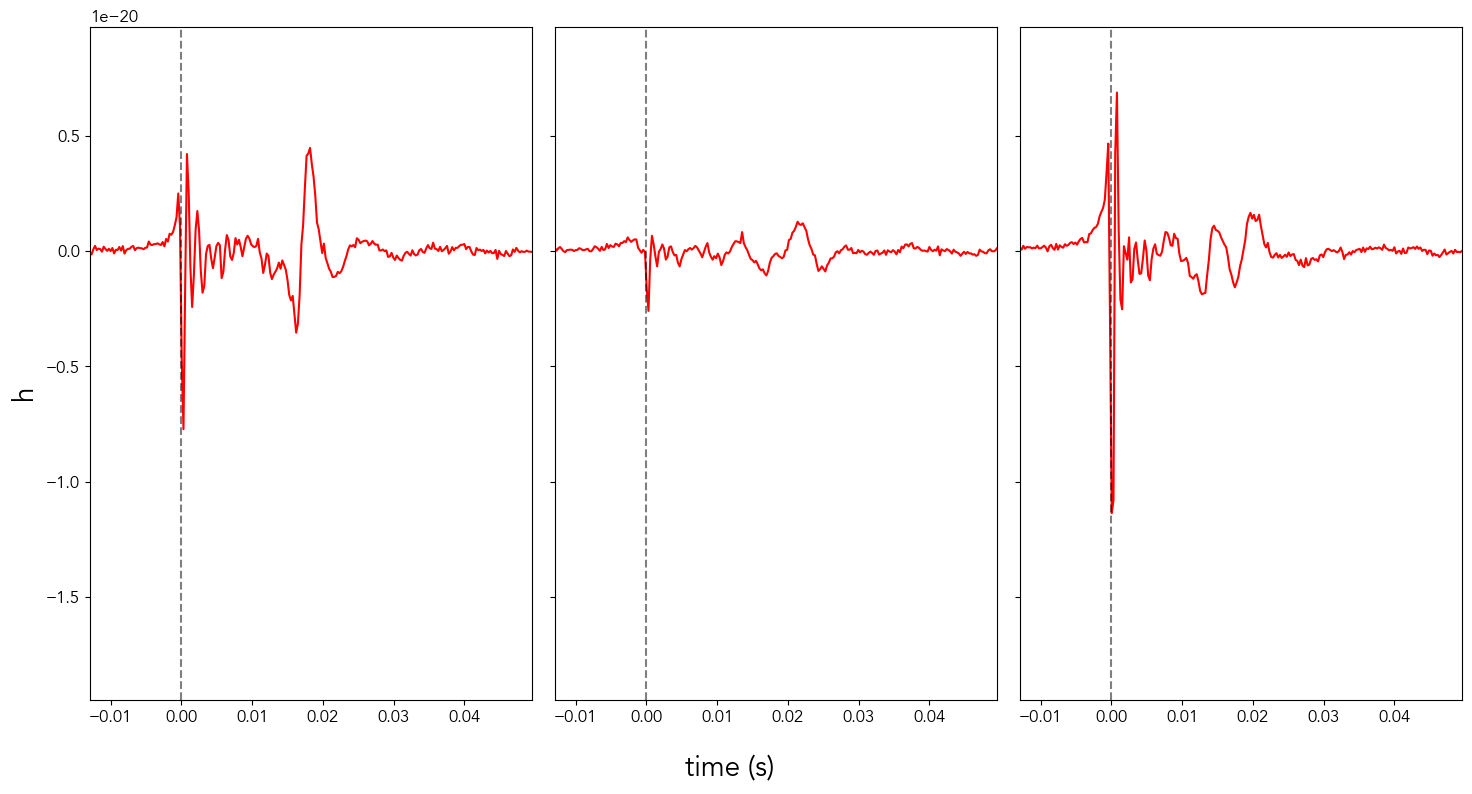

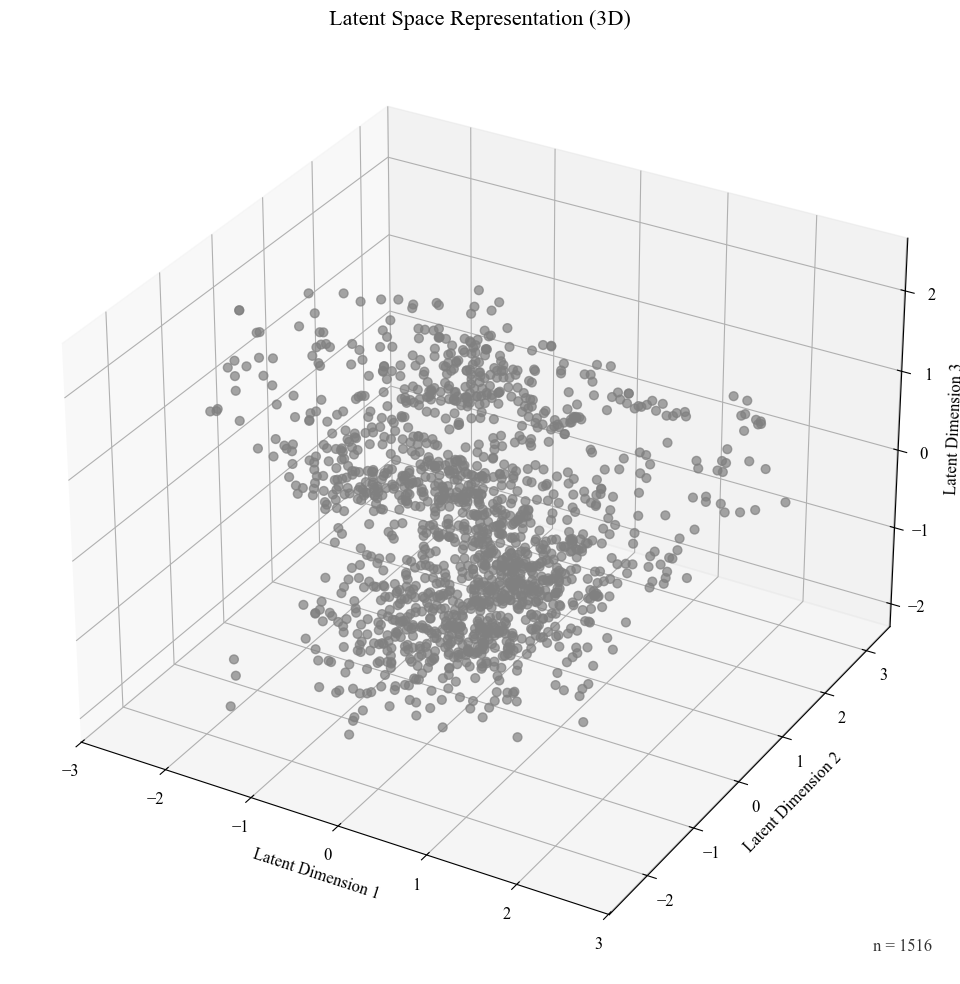

Epochs:  18%|█▊        | 47/256 [01:51<08:05,  2.33s/it]

Generated signals shape: (32, 256)


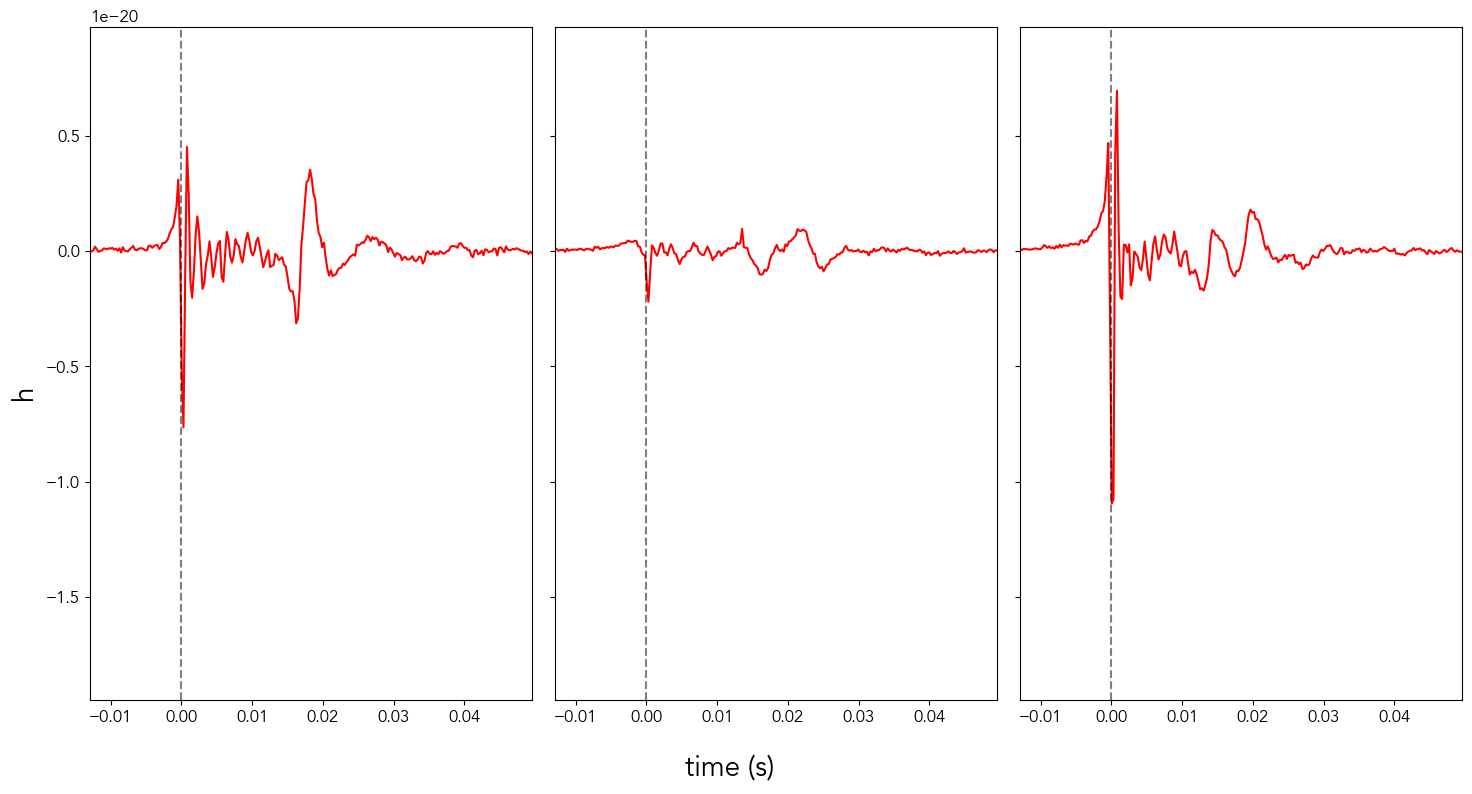

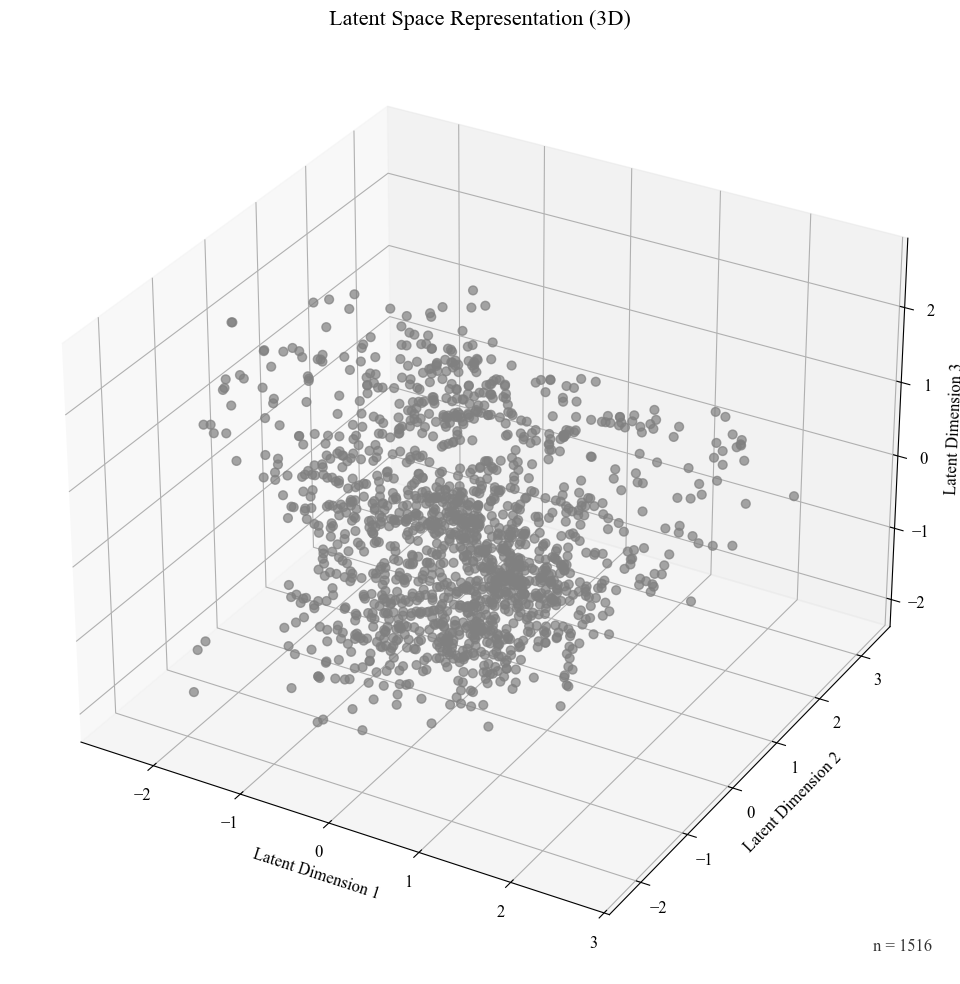

Epochs:  25%|██▍       | 63/256 [02:34<08:12,  2.55s/it]

Generated signals shape: (32, 256)


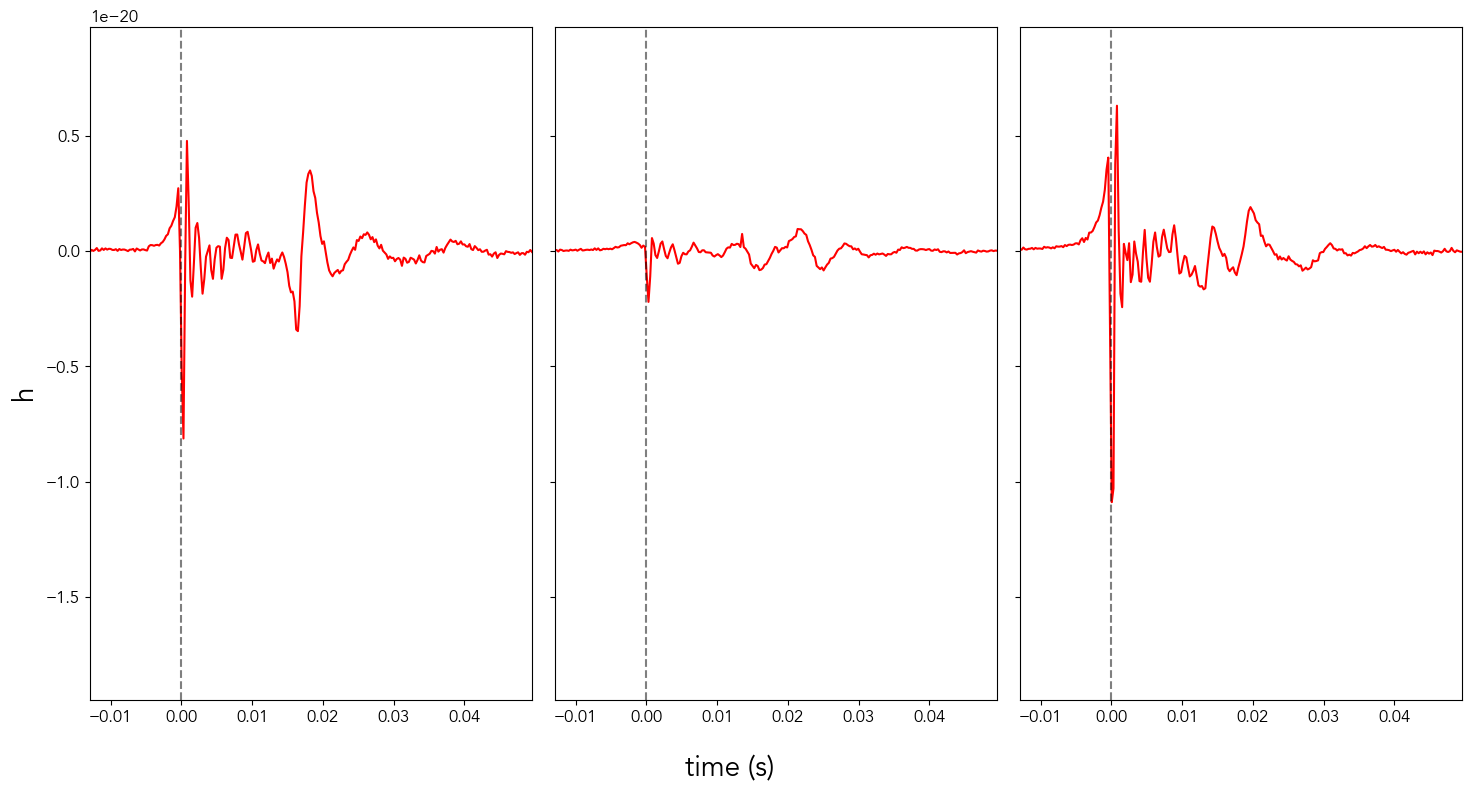

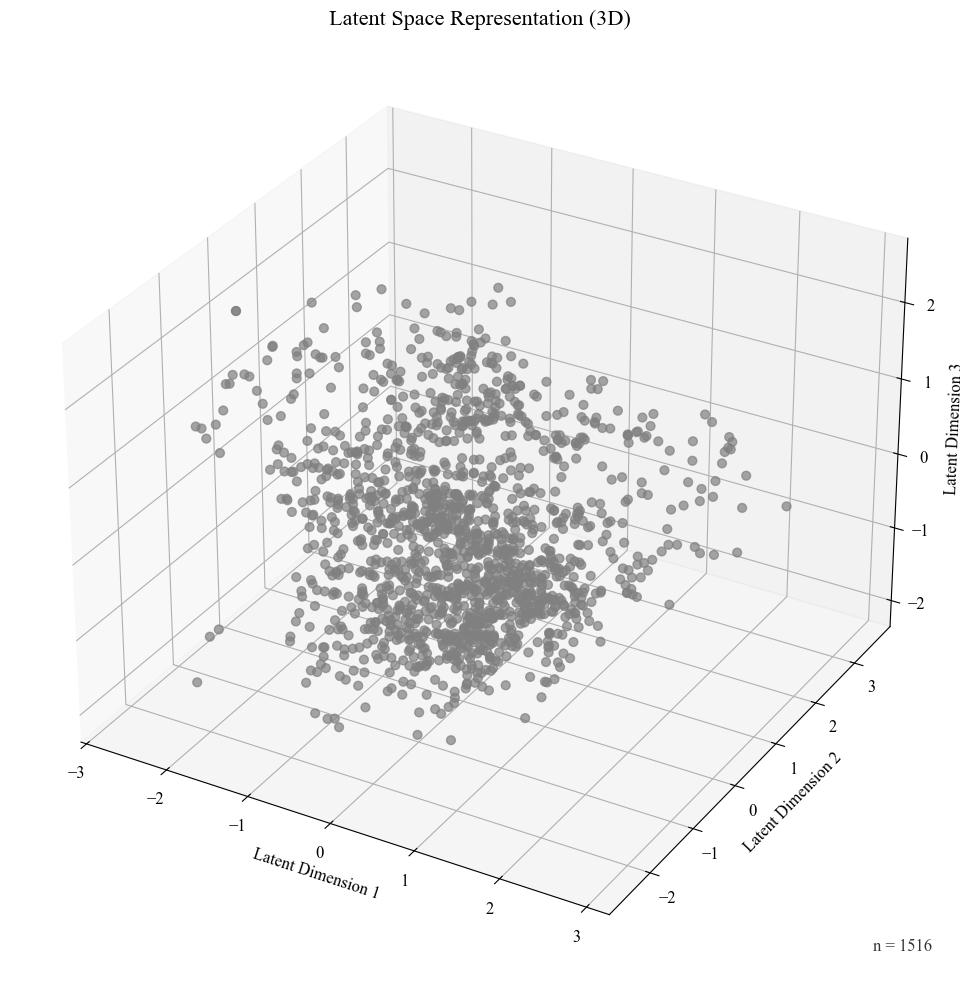

Epochs:  31%|███       | 79/256 [03:14<07:02,  2.39s/it]

Generated signals shape: (32, 256)


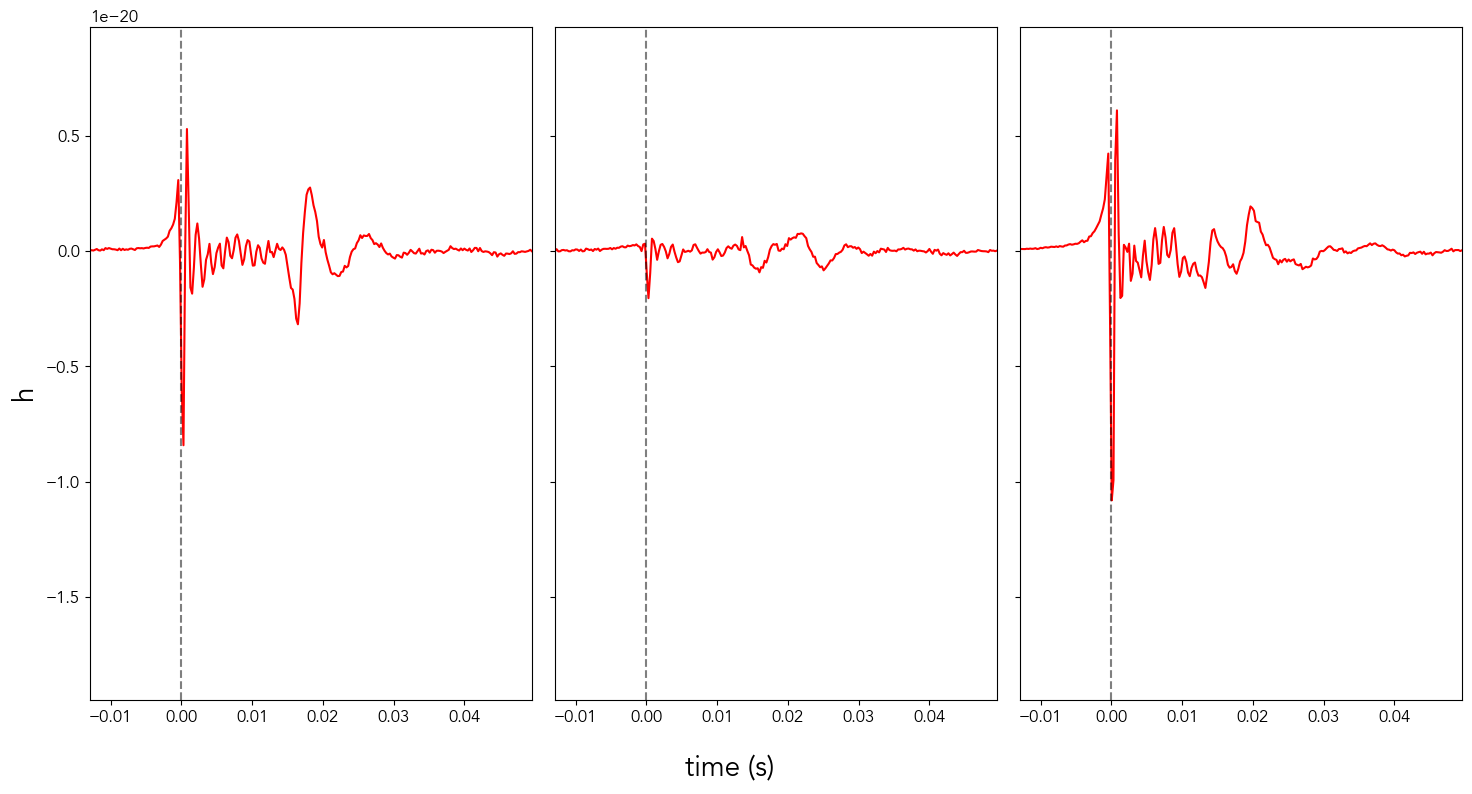

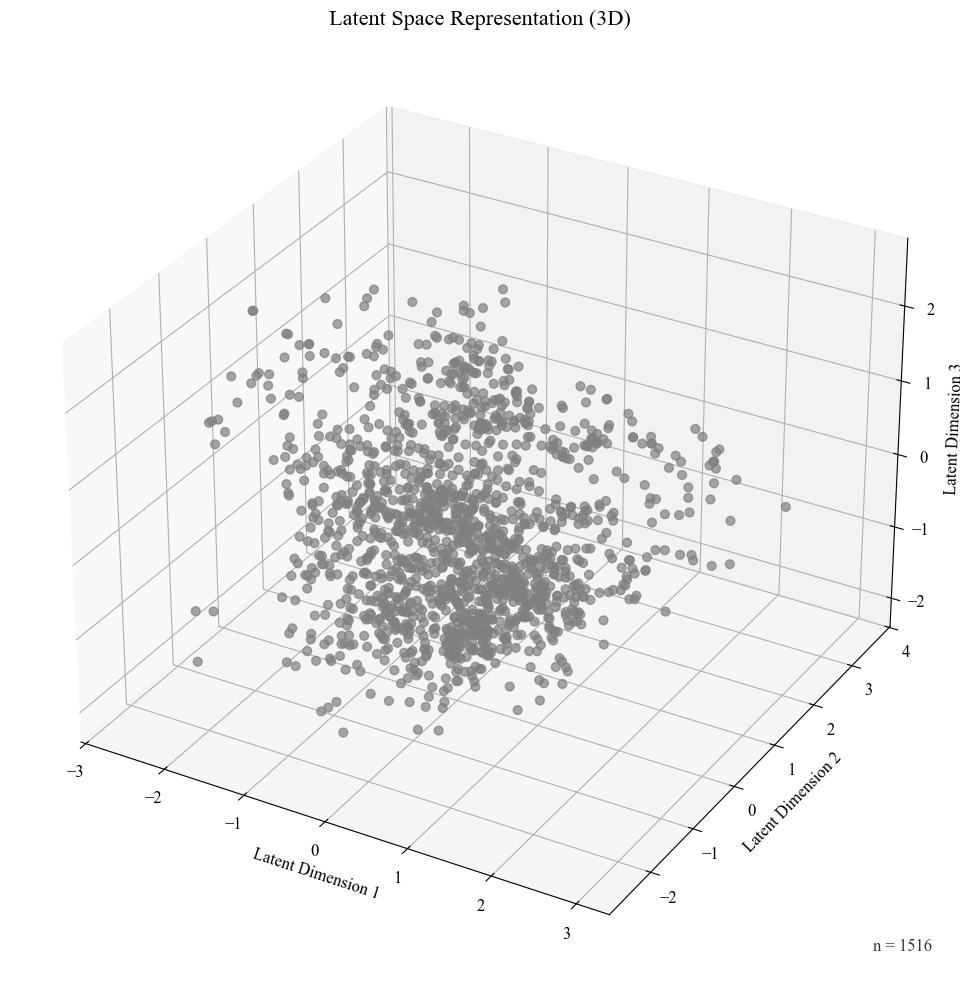

Epochs:  37%|███▋      | 95/256 [03:55<06:23,  2.38s/it]

Generated signals shape: (32, 256)


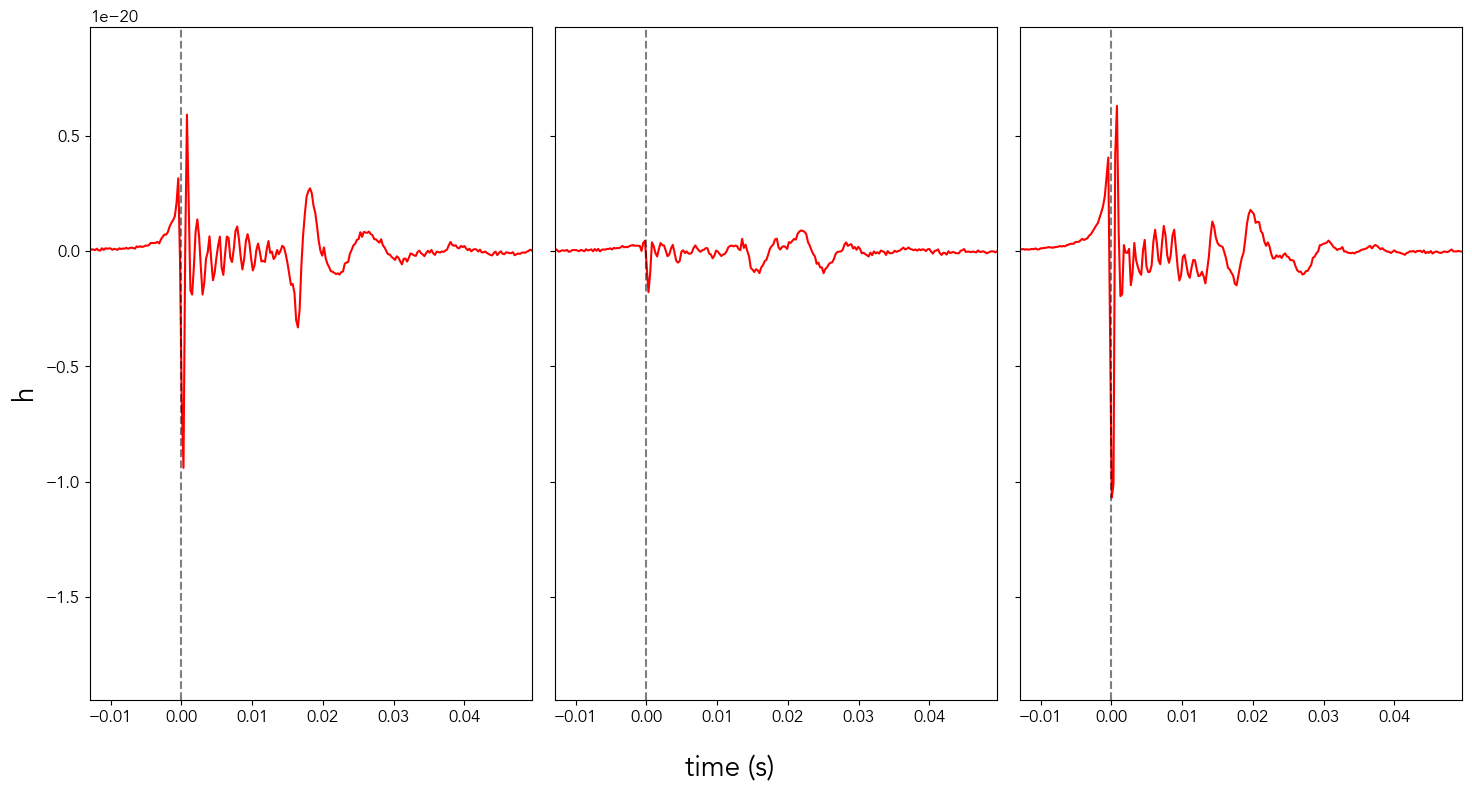

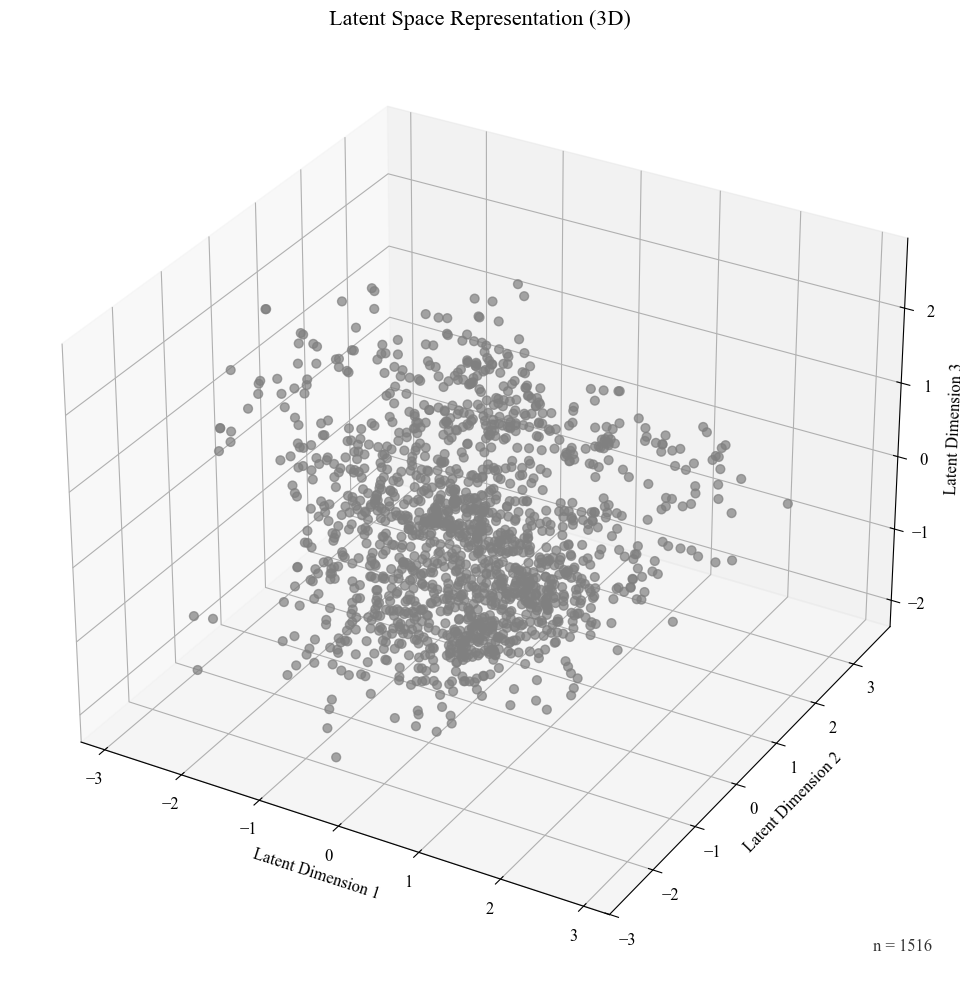

Epochs:  43%|████▎     | 111/256 [04:36<05:50,  2.41s/it]

Generated signals shape: (32, 256)


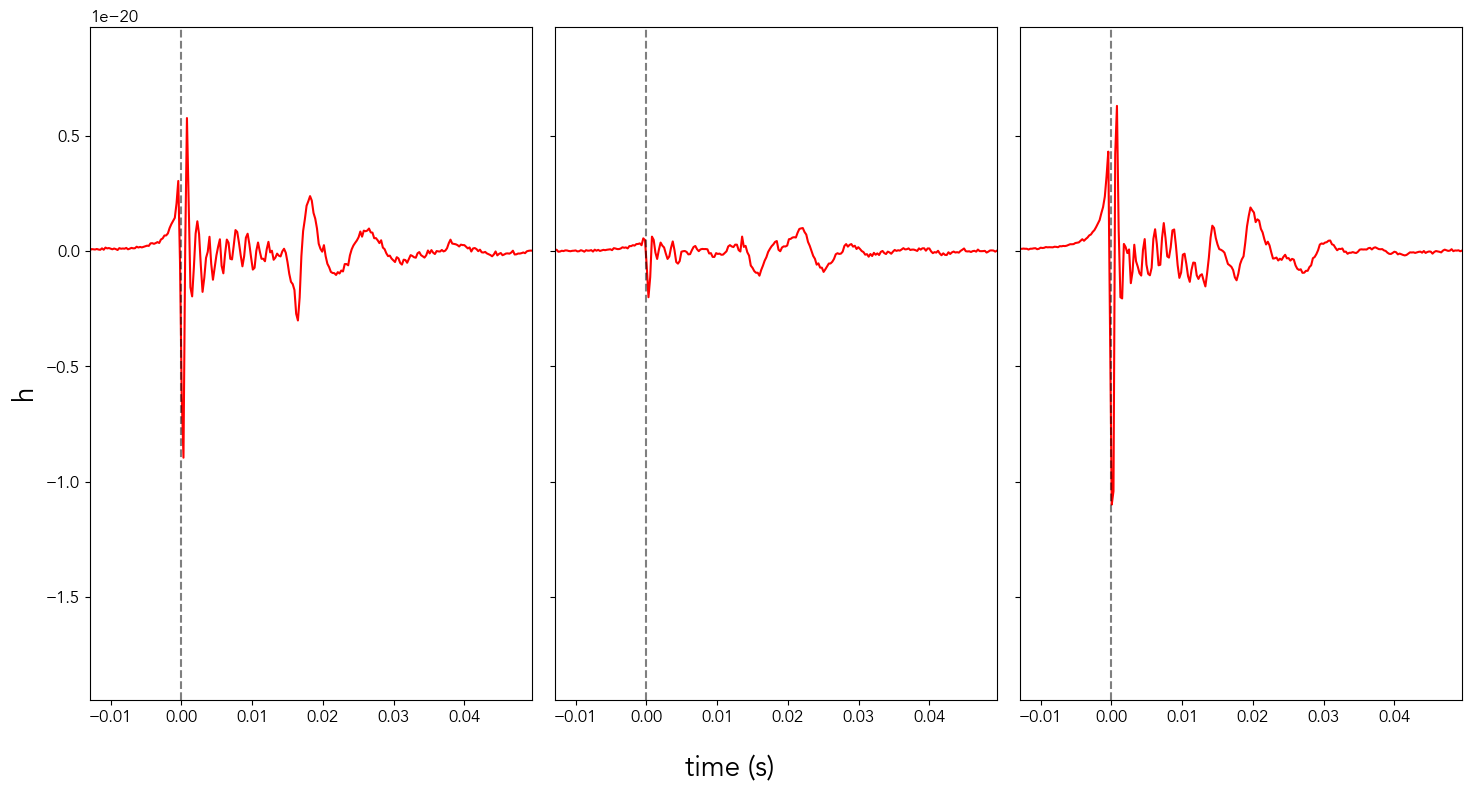

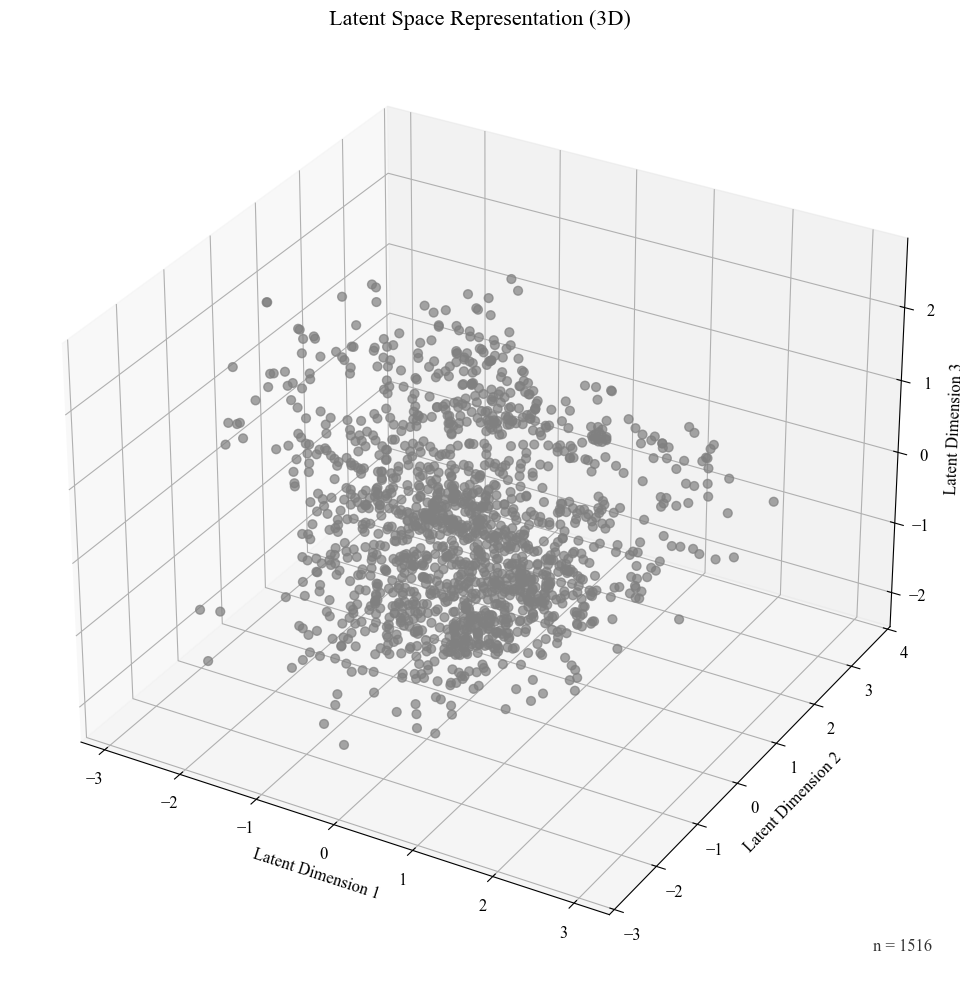

Epochs:  50%|████▉     | 127/256 [05:16<04:58,  2.31s/it]

Generated signals shape: (32, 256)


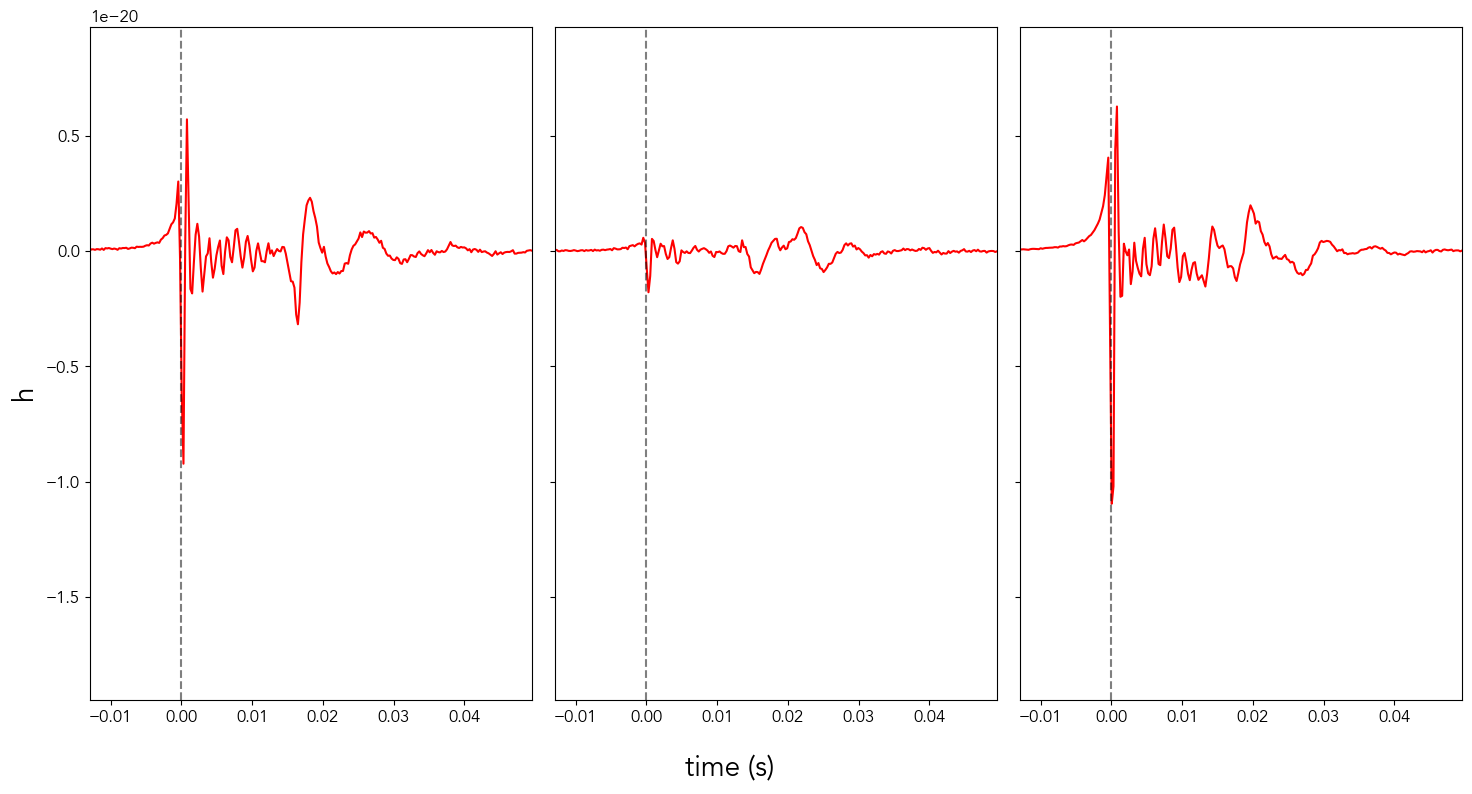

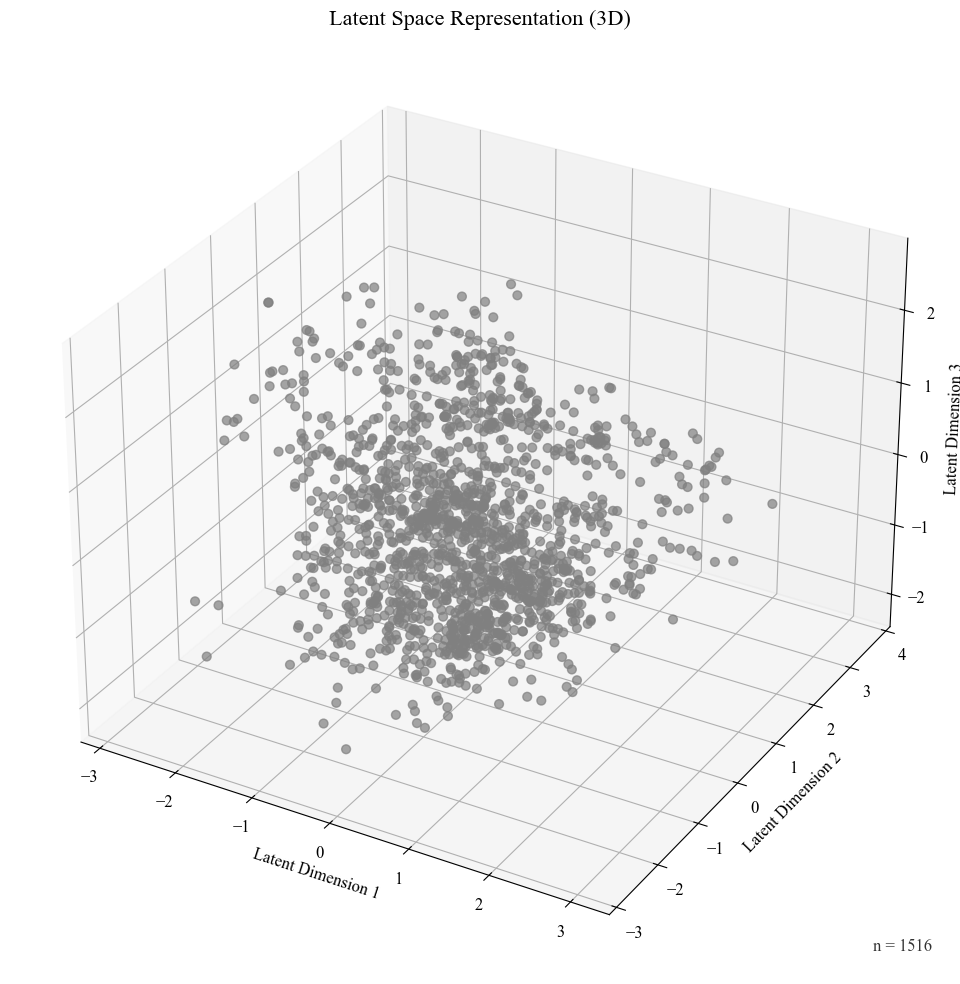

Epochs:  56%|█████▌    | 143/256 [05:56<04:23,  2.34s/it]

Generated signals shape: (32, 256)


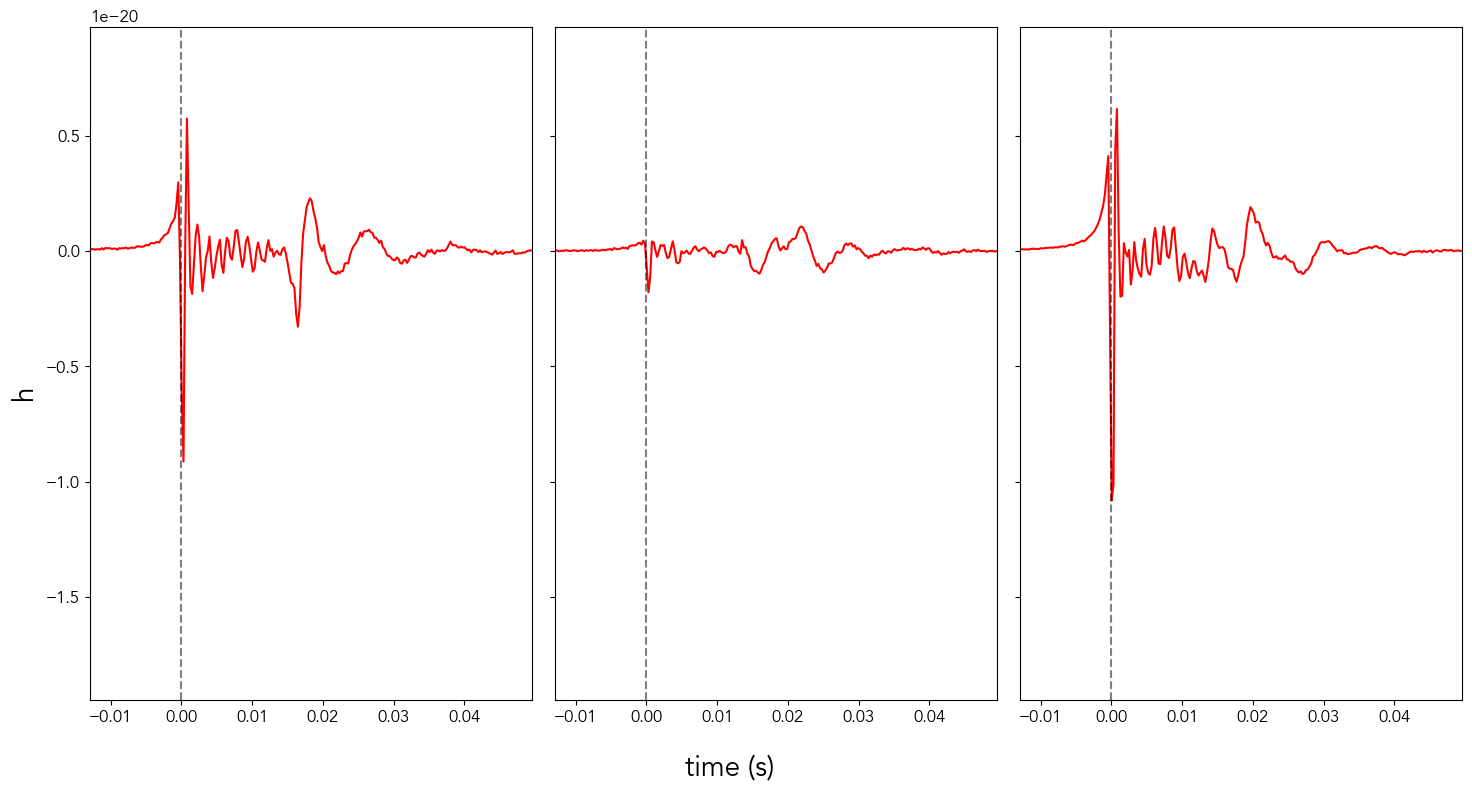

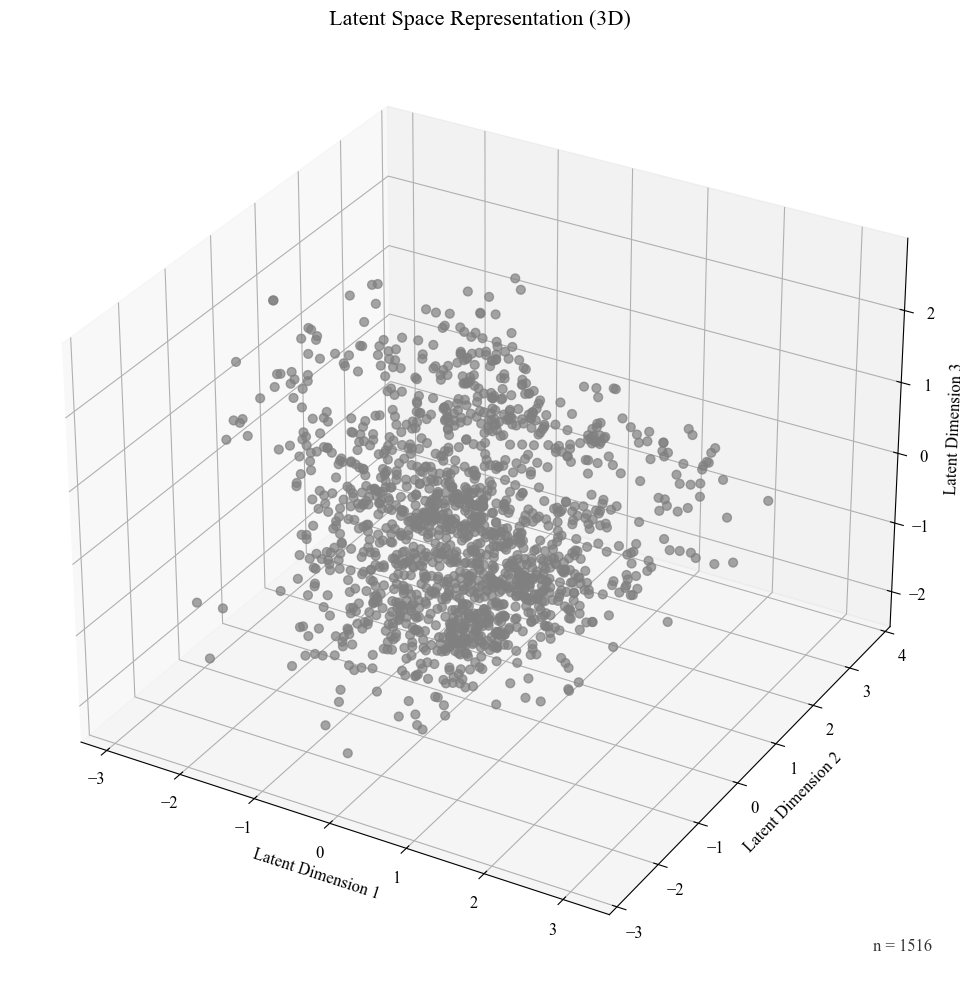

Epochs:  62%|██████▏   | 159/256 [06:37<03:58,  2.46s/it]

Generated signals shape: (32, 256)


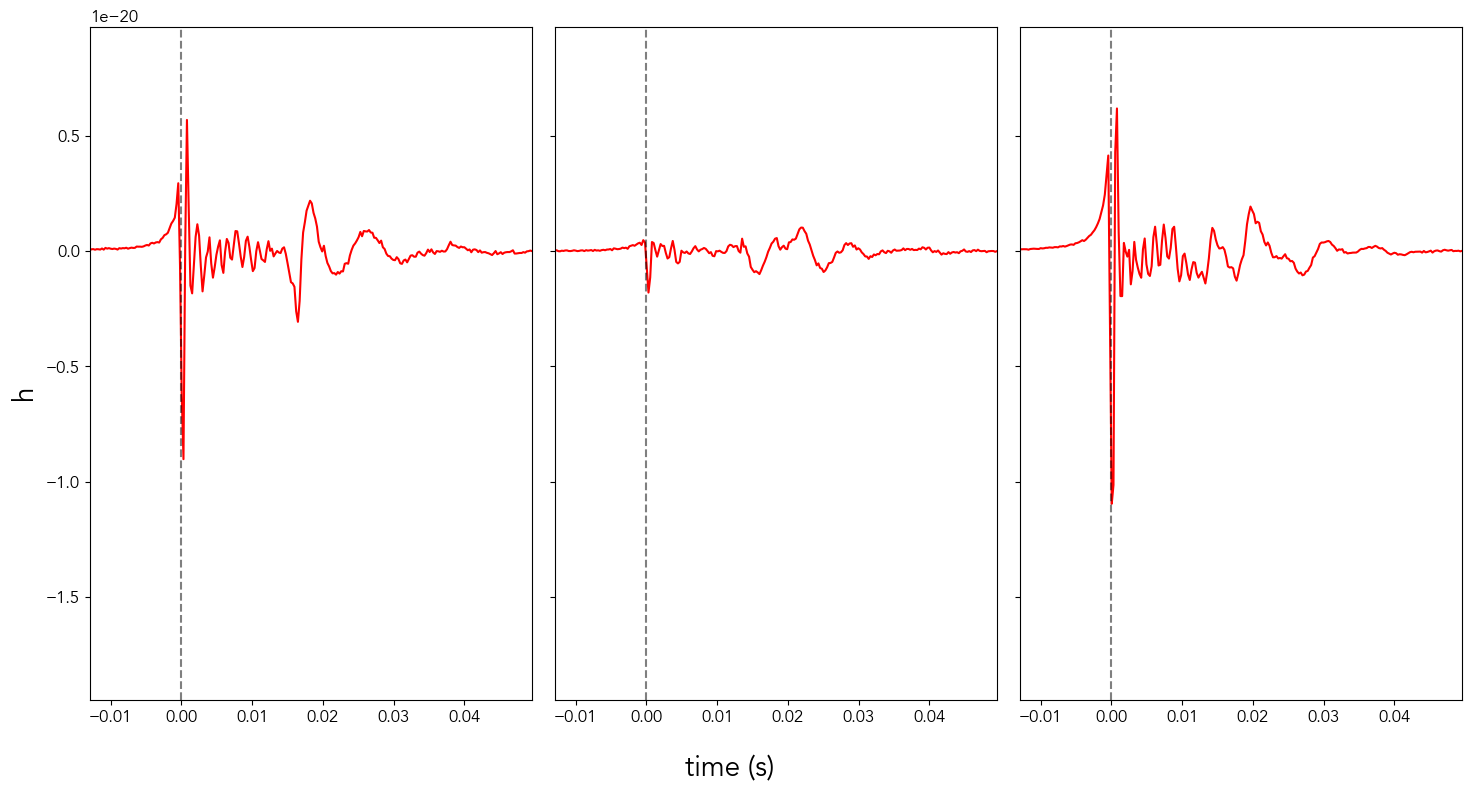

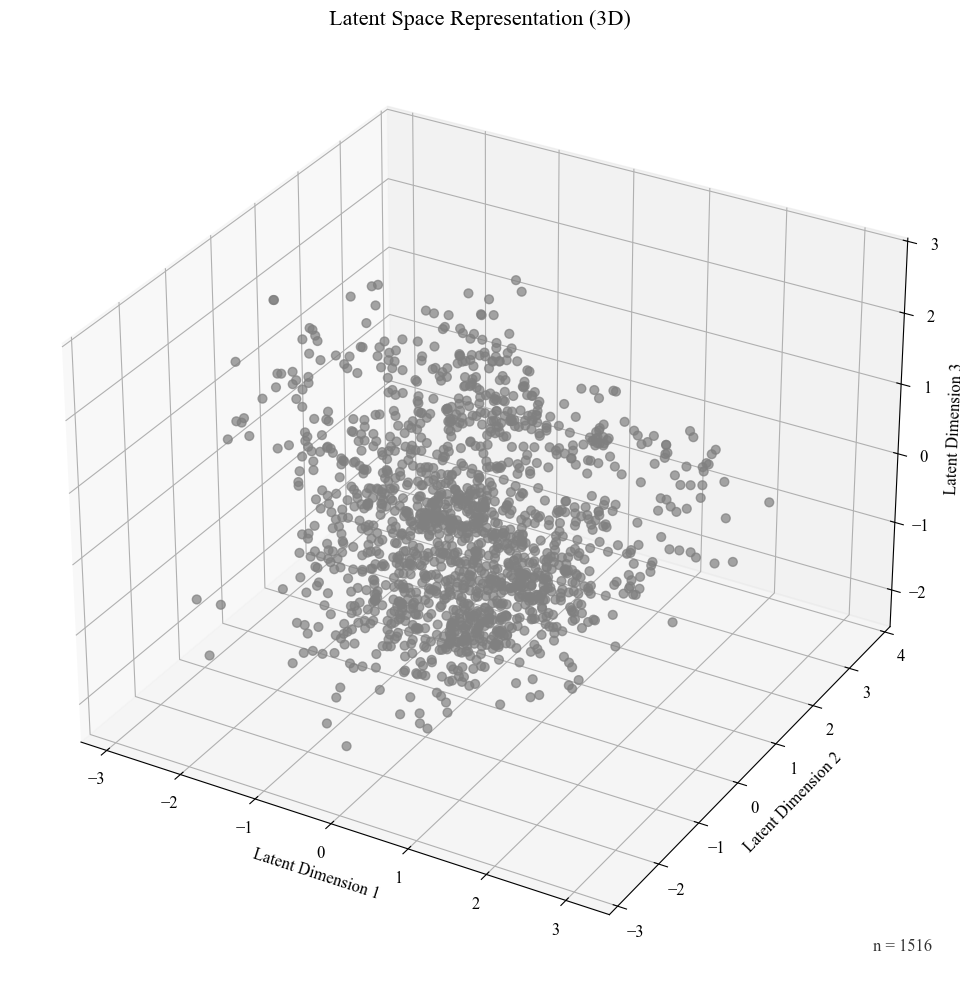

Epochs:  68%|██████▊   | 175/256 [07:18<03:13,  2.39s/it]

Generated signals shape: (32, 256)


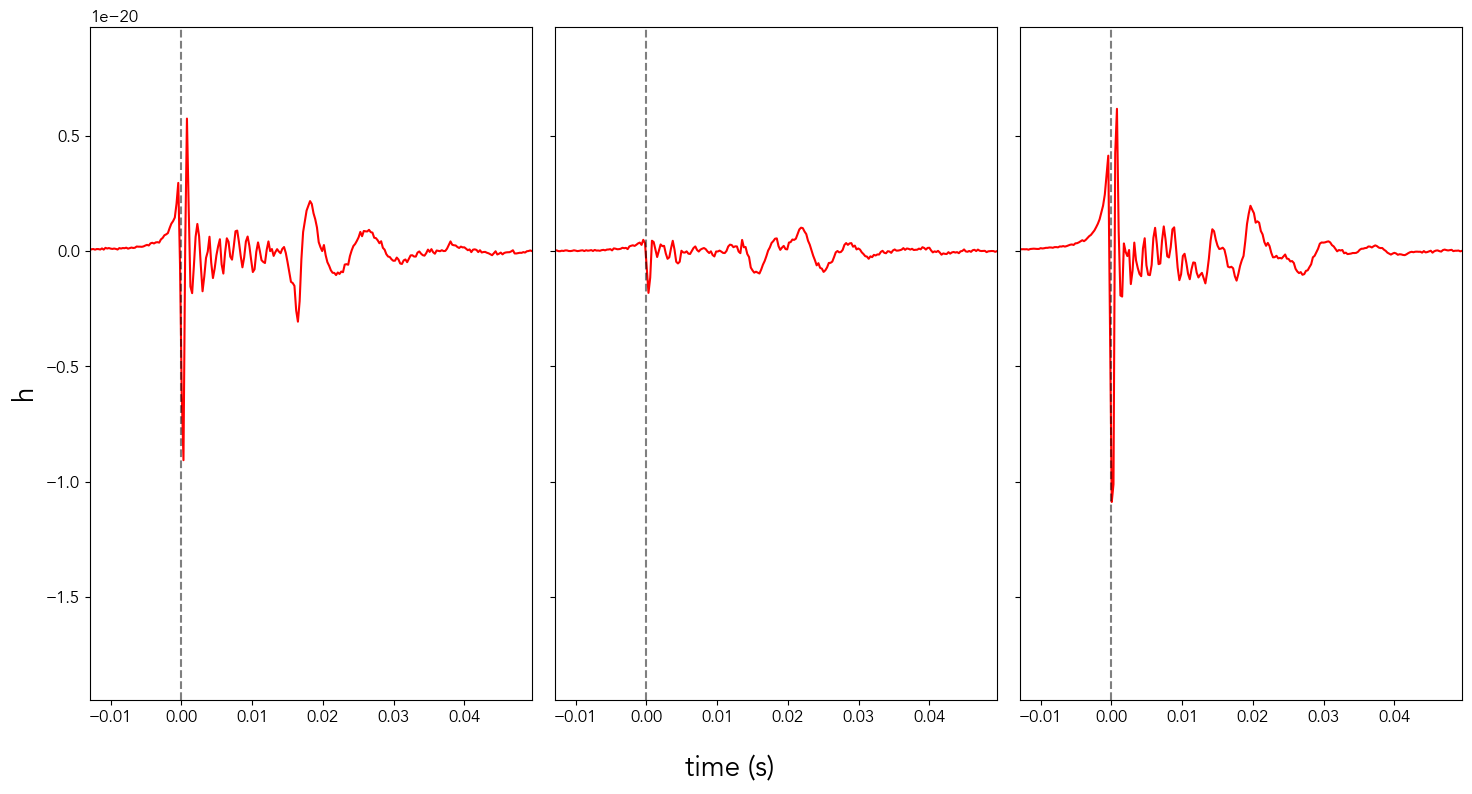

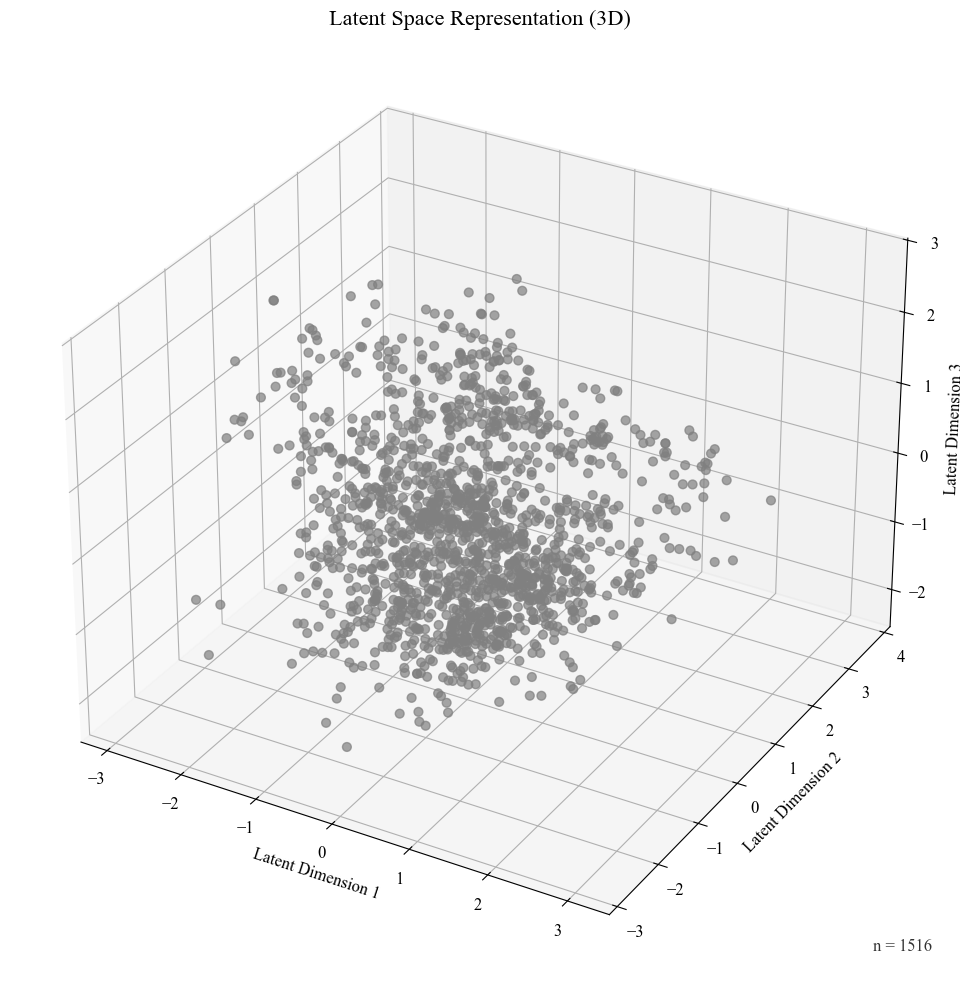

Epochs:  75%|███████▍  | 191/256 [07:58<02:43,  2.52s/it]

Generated signals shape: (32, 256)


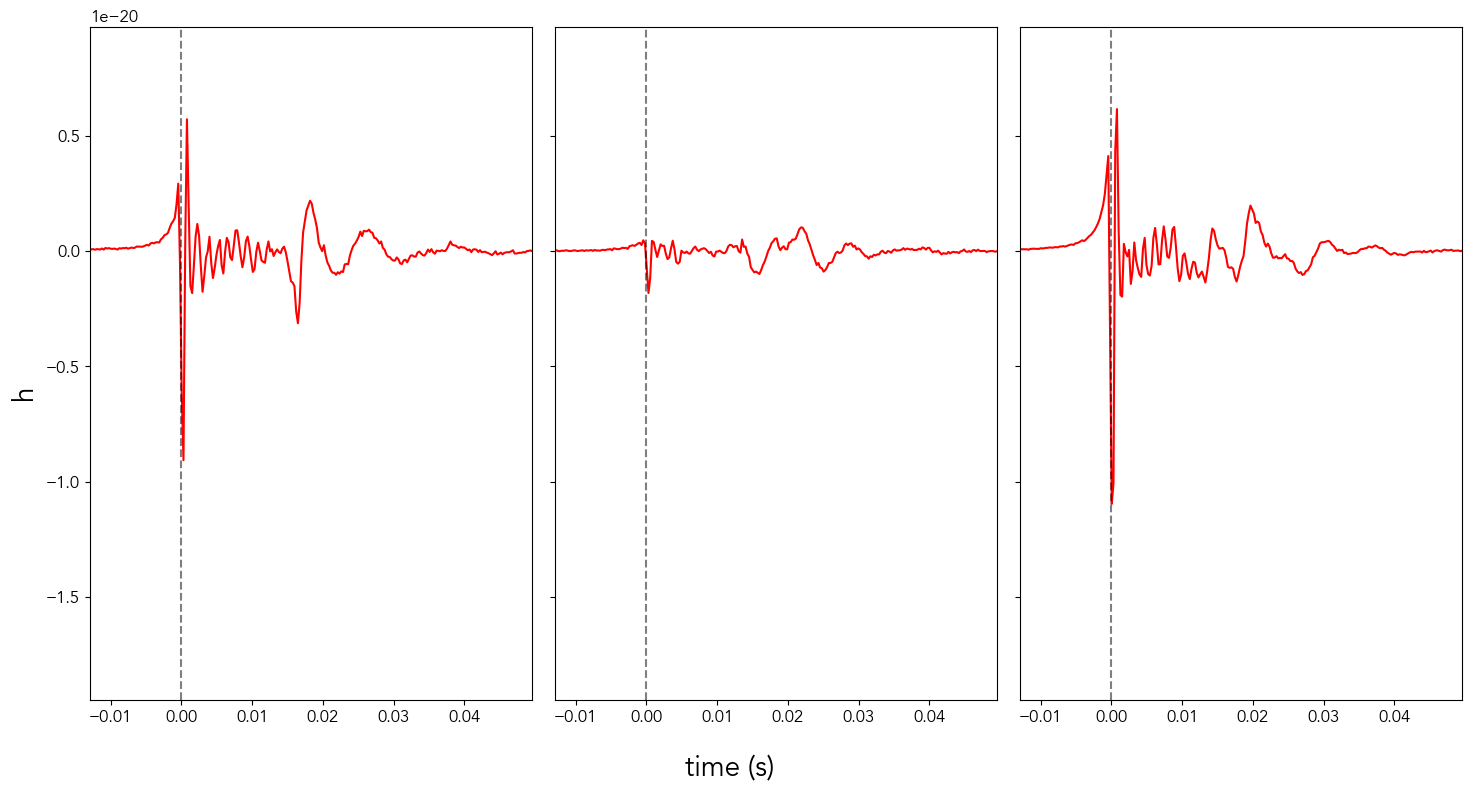

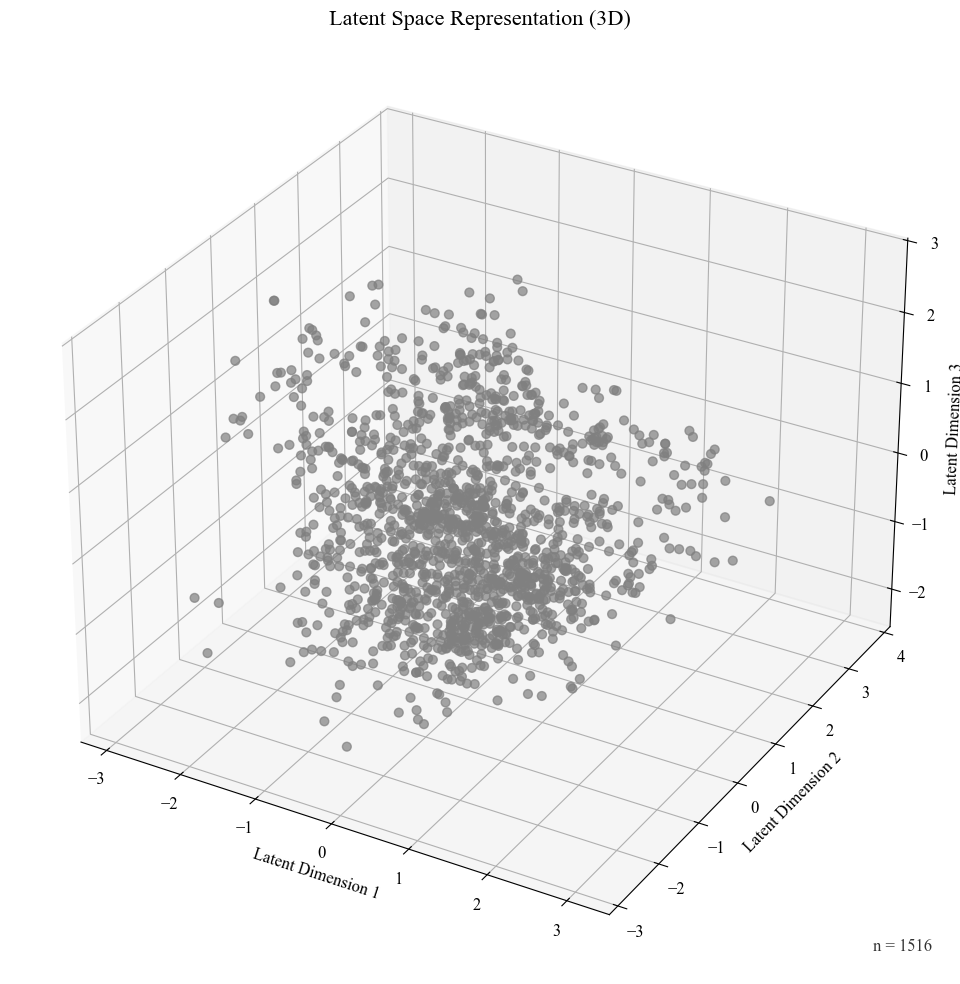

Epochs:  81%|████████  | 207/256 [08:40<02:04,  2.55s/it]

Generated signals shape: (32, 256)


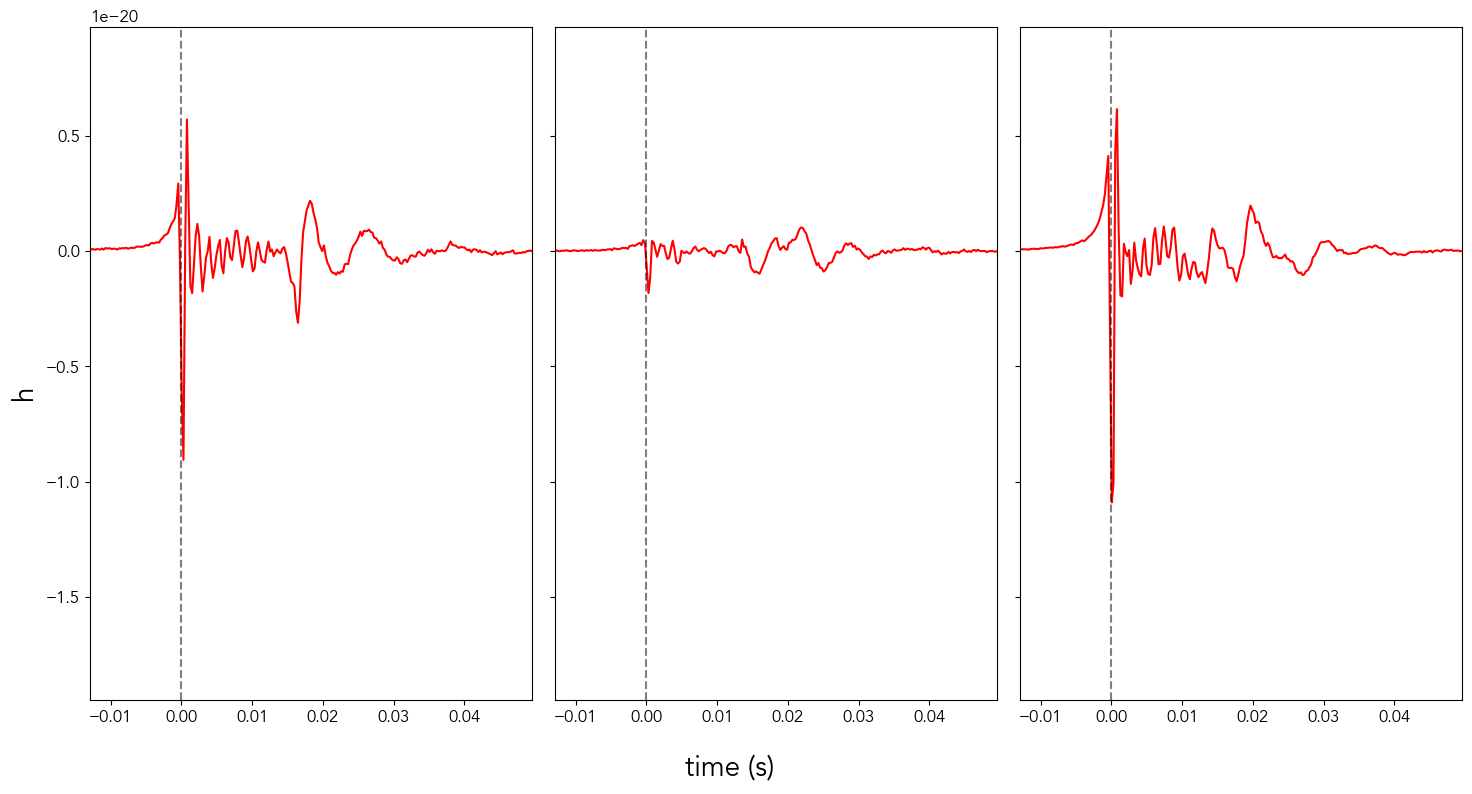

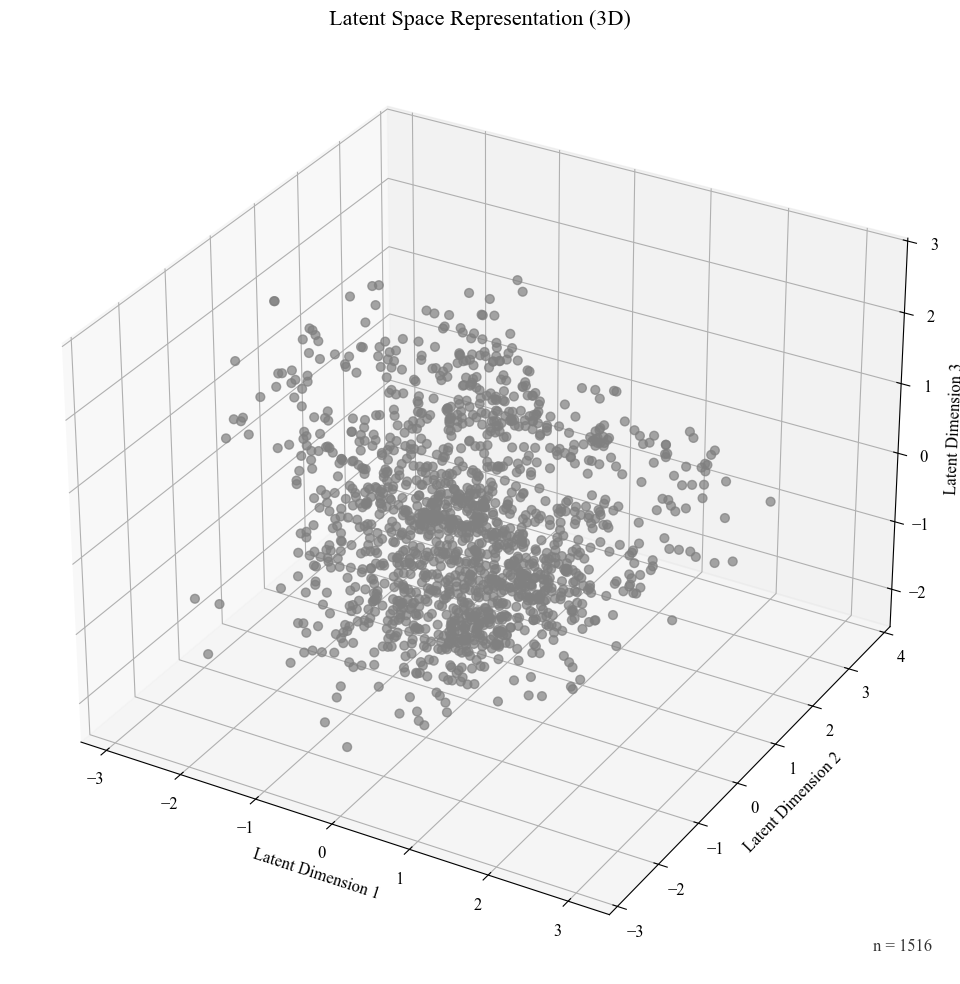

Epochs:  87%|████████▋ | 223/256 [09:21<01:19,  2.41s/it]

Generated signals shape: (32, 256)


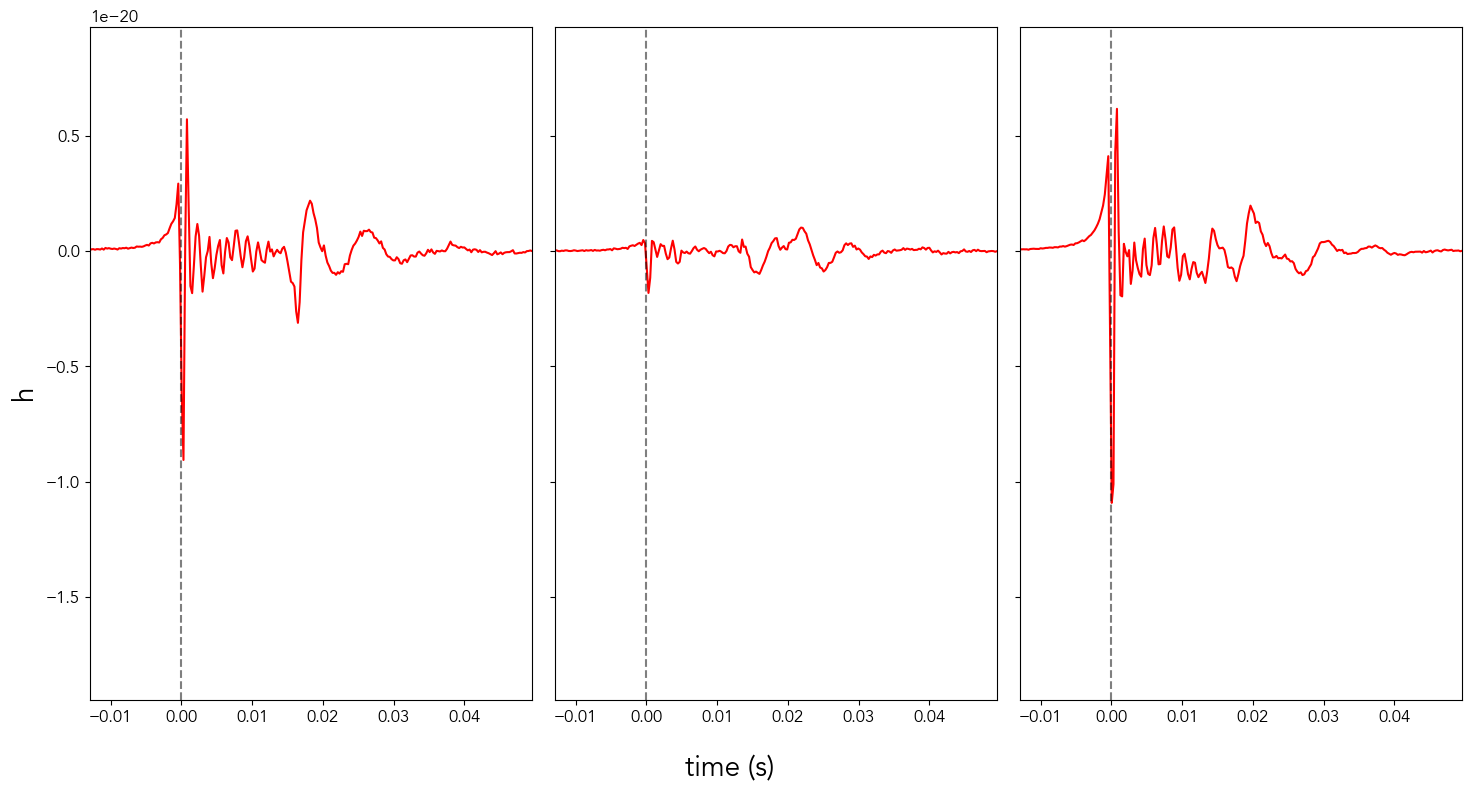

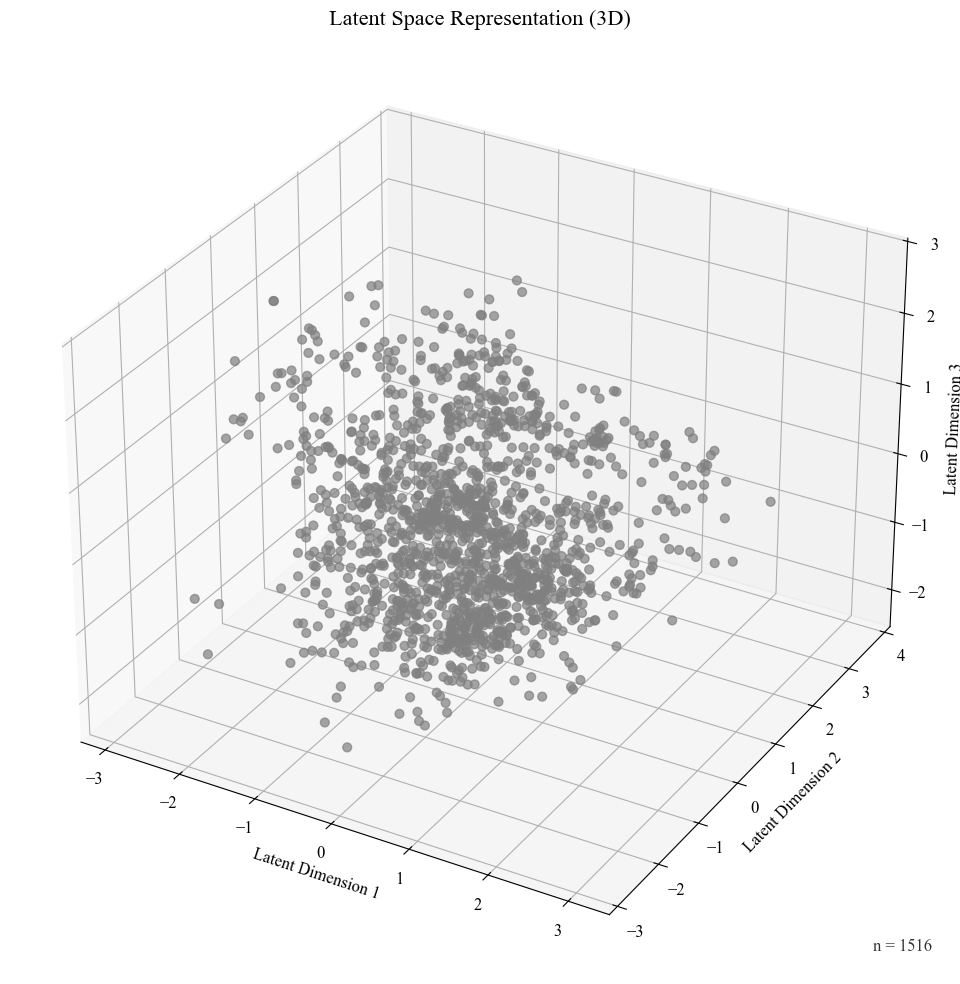

Epochs:  93%|█████████▎| 239/256 [10:02<00:41,  2.42s/it]

Generated signals shape: (32, 256)


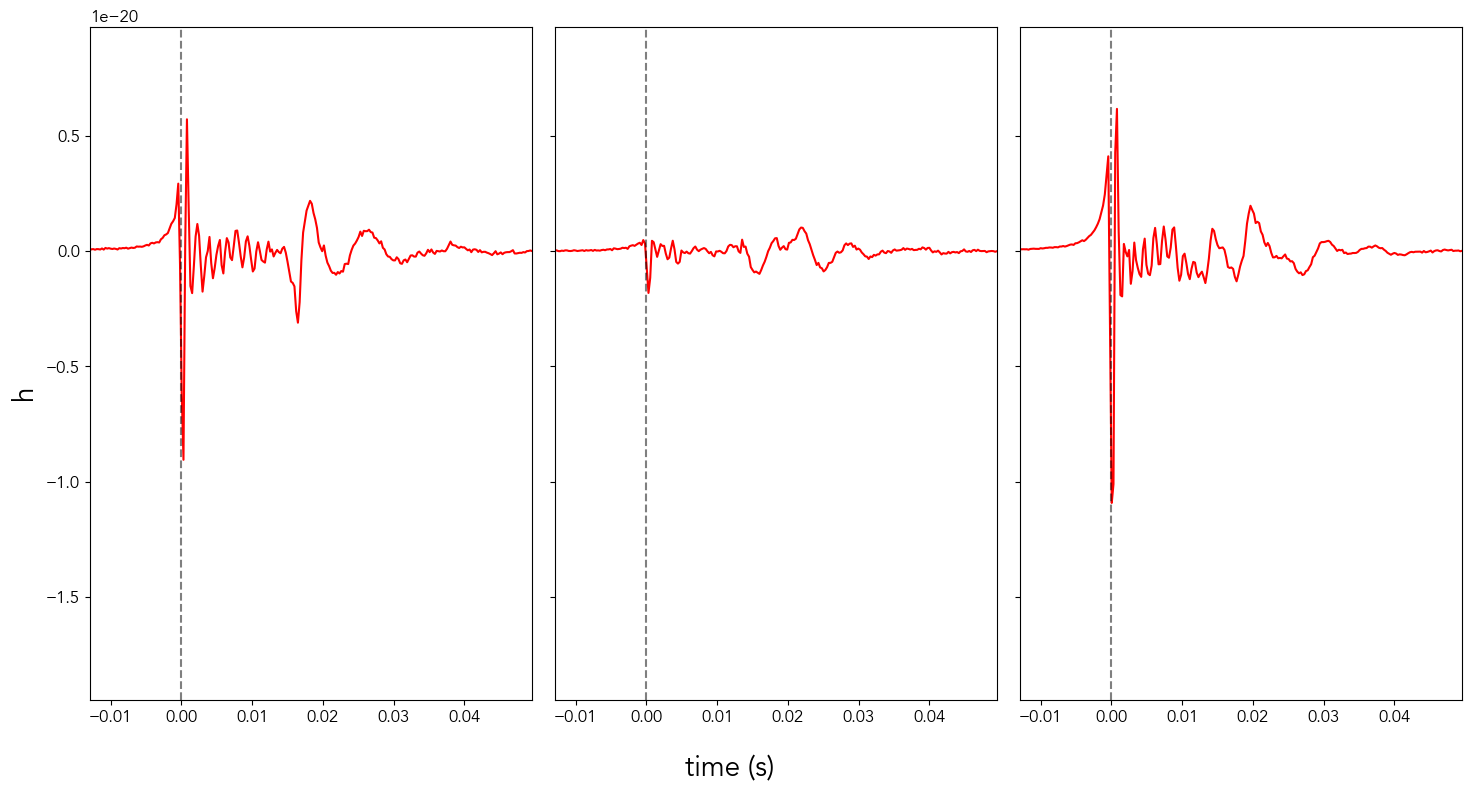

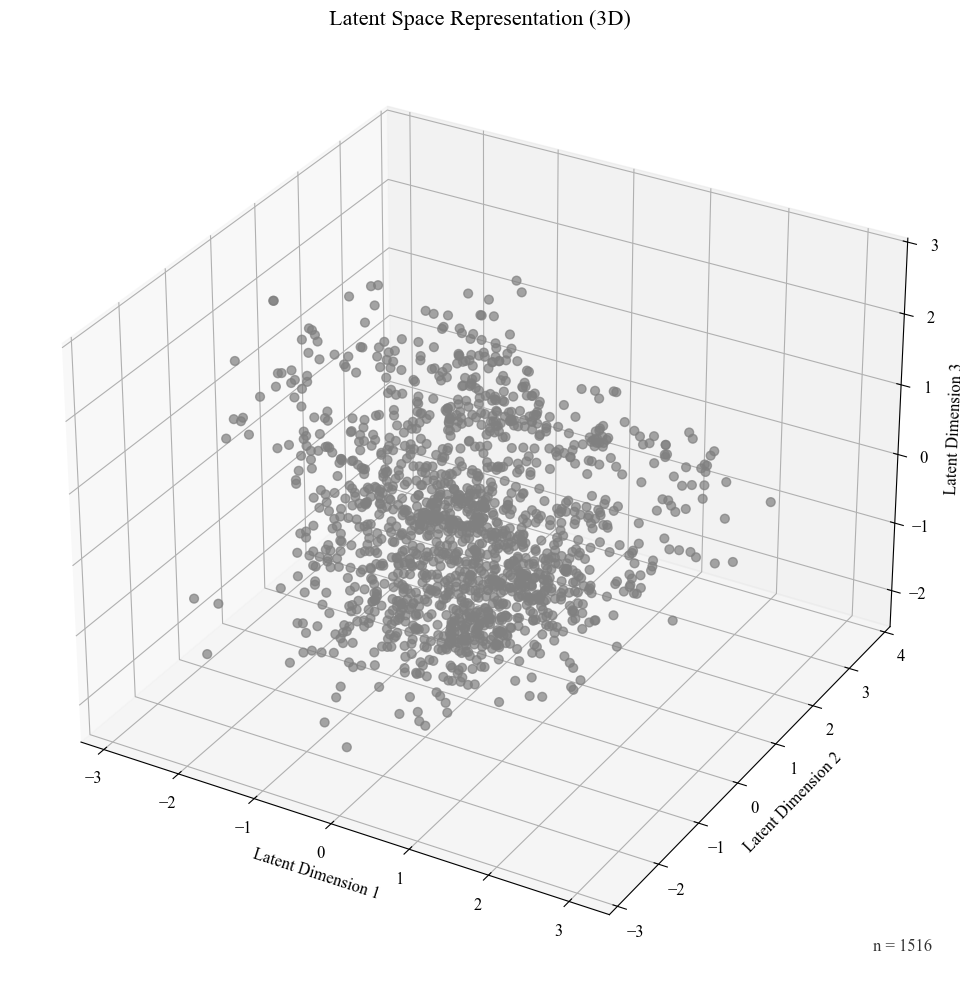

Epochs: 100%|█████████▉| 255/256 [10:42<00:02,  2.37s/it]

Generated signals shape: (32, 256)


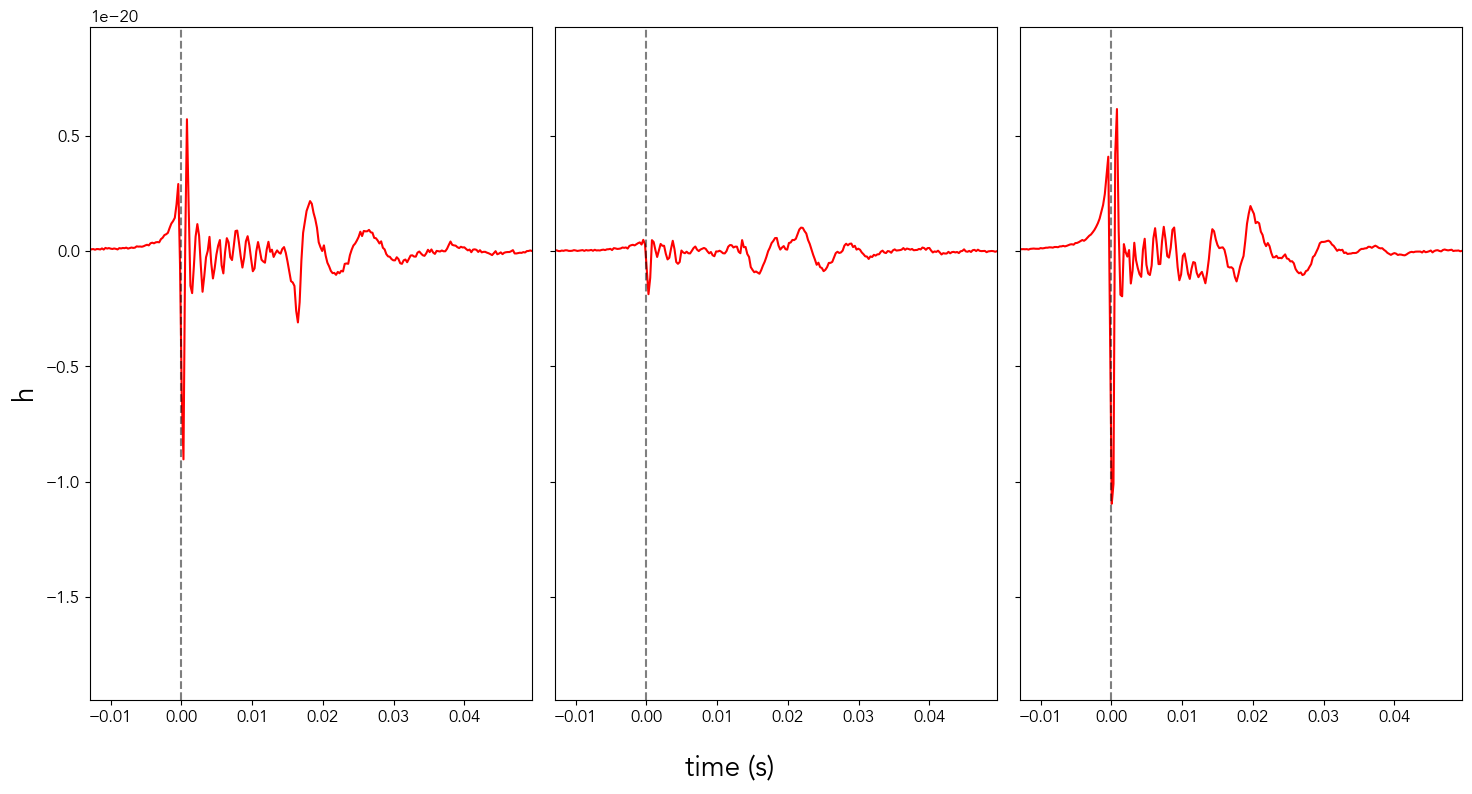

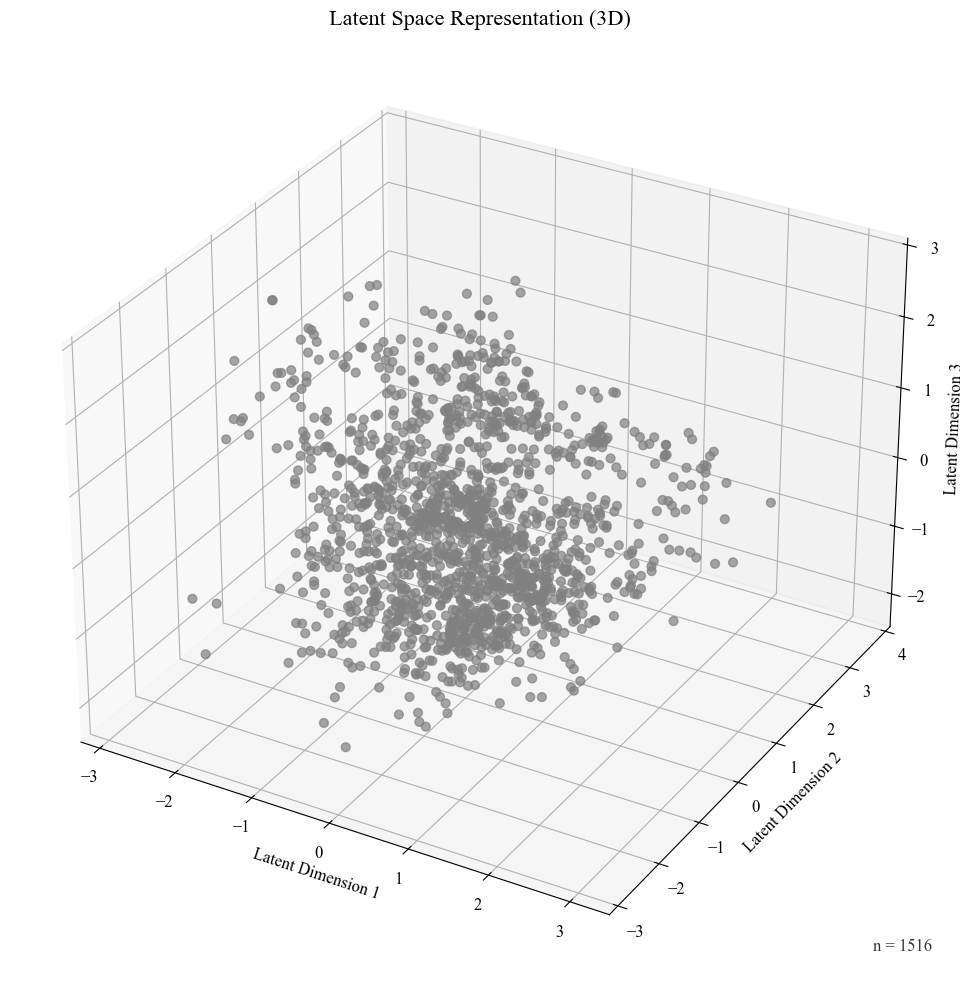

Epochs: 100%|██████████| 256/256 [10:47<00:00,  2.53s/it]

Training Time: 10.79min
Saved VAE model to outdir/generator_weights.pt

Starting Flow Training


In [7]:
trainer.train()

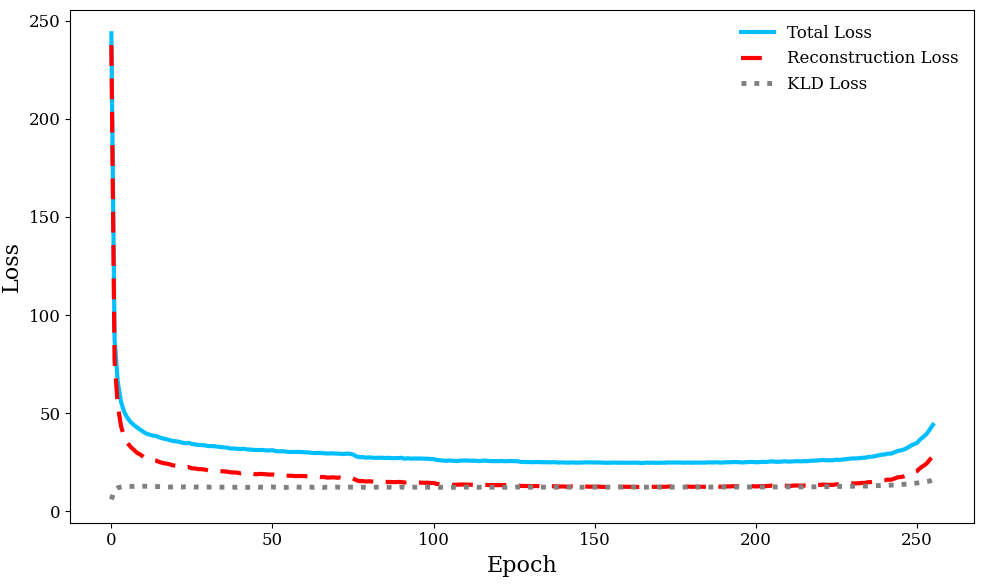

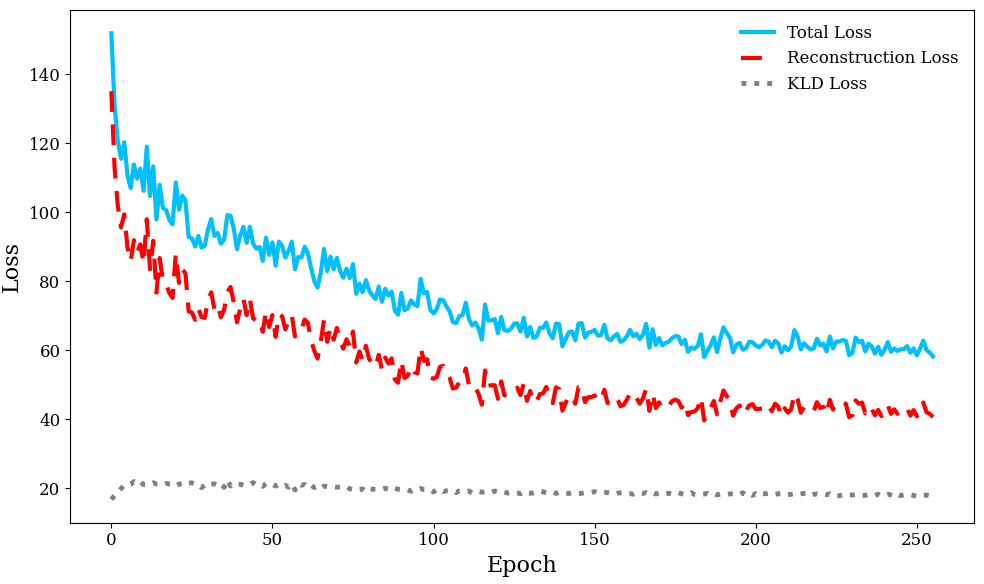

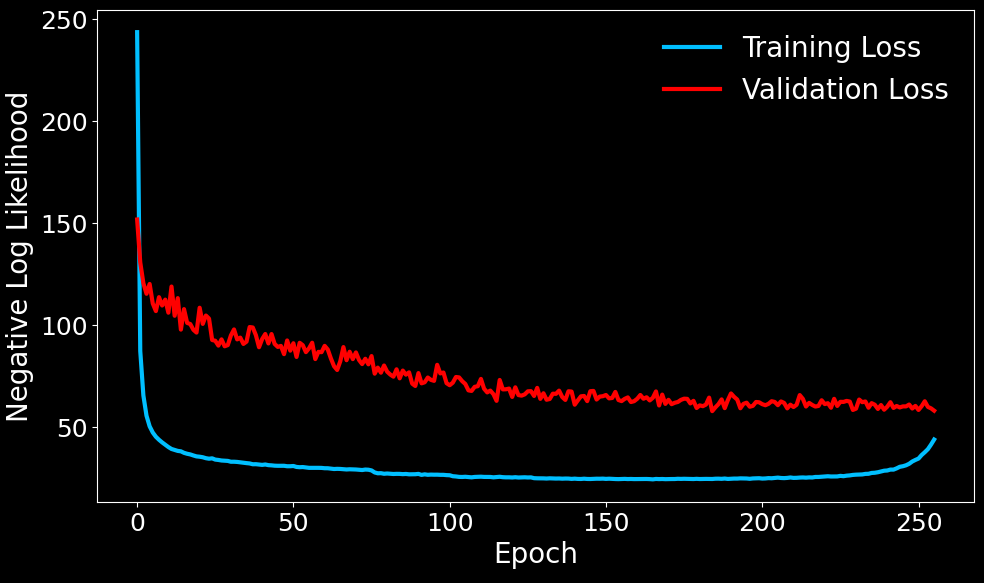

In [8]:
trainer.display_results()

In [9]:
index = 160
trainer.val_loader.dataset.update_snr(30)
signal, noisy_signal, params = trainer.val_loader.dataset.__getitem__(index)

trainer.plot_reconstruction_distribution(
    num_samples=1000,
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [ ]:
trainer.val_loader.dataset.update_snr(20)
signal, noisy_signal, params = trainer.val_loader.dataset.__getitem__(9)
plot_candidate_signal(noisy_signal=noisy_signal/TEN_KPC, signal=signal/TEN_KPC, max_value=trainer.validation_dataset.max_strain, fname="plots/detected_signal.svg", background="black")
trainer.plot_corner(signal=signal, noisy_signal=noisy_signal, params=params, fname="plots/corner_plot.svg")

Computing latent space coordinates (this will be reused)...


/var/folders/qy/p5knypnd54x1dfyxqbs0175r0000gn/T/ipykernel_9487/4047515054.py:186: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x).unsqueeze(0).to(DEVICE)


Cached latent means shape: (1684, 8)
Now you can create multiple animations with consistent latent space!

Using cached latent means shape: (1684, 8)
Mean 1 shape: torch.Size([8])
Saving animation to plots/latent_morph_300-1000.gif...
Saving animation to plots/latent_morph_300-1000.gif...
Animation saved successfully!
Animation saved successfully!


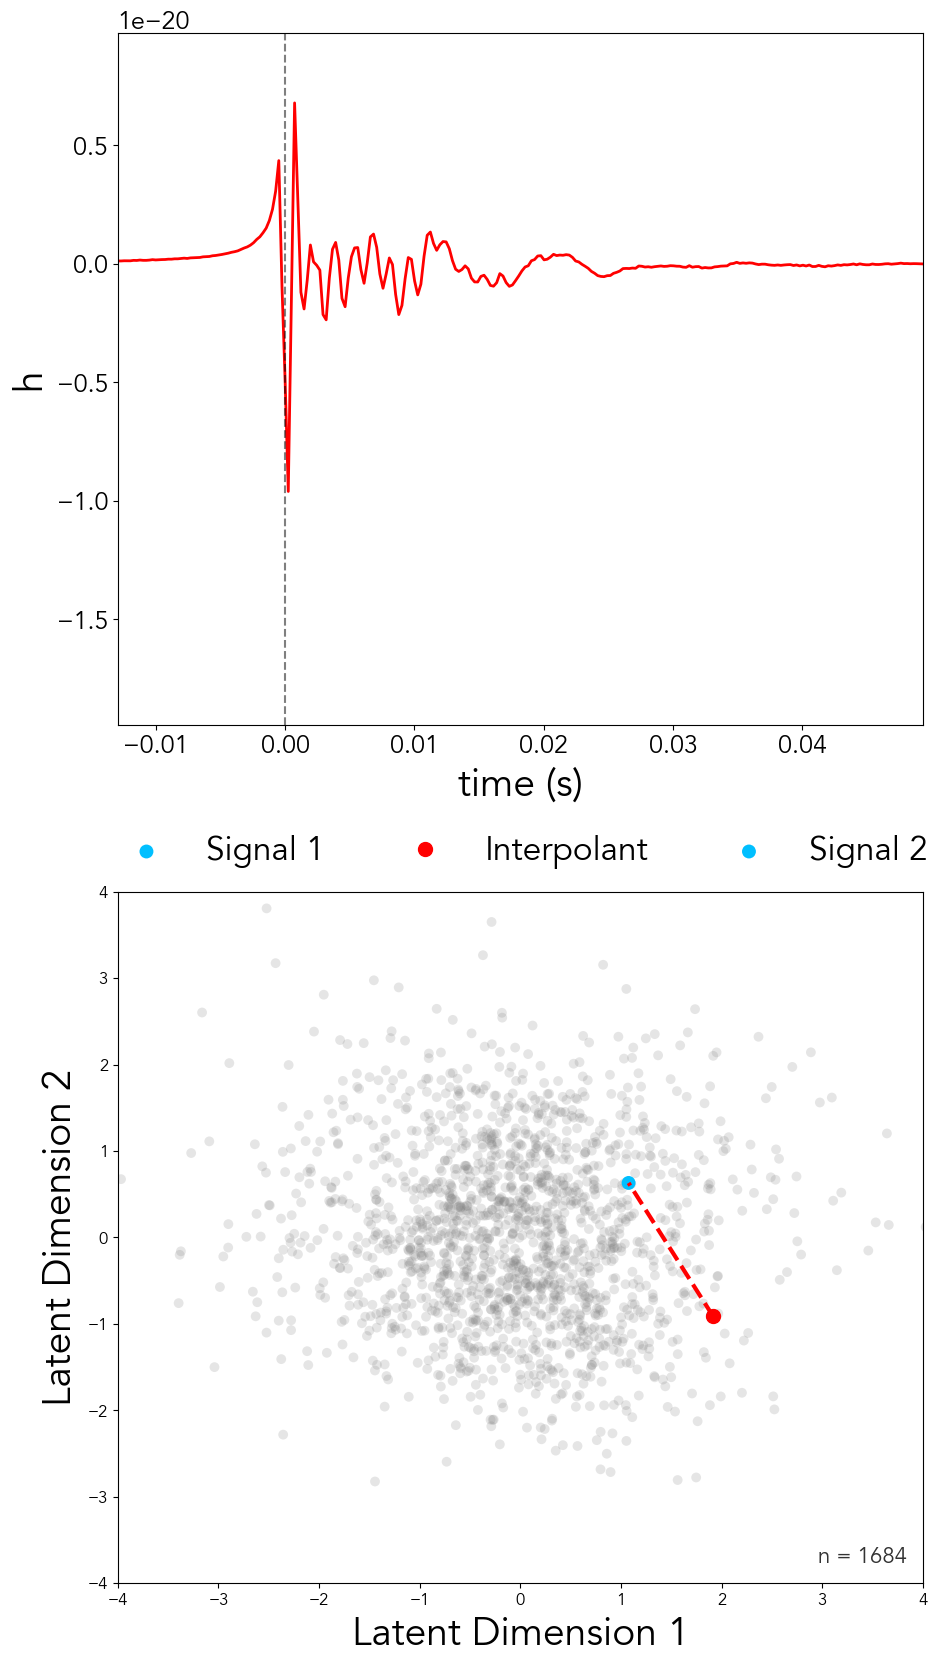

array([[-0.79981   ,  0.79816157, -1.1322663 , ..., -0.02742503,
         0.19174775, -1.1206081 ],
       [-0.9932346 ,  0.18221946, -1.1583087 , ...,  1.2567849 ,
        -0.34092367, -1.3397133 ],
       [-0.07640076,  0.03752628, -1.6918732 , ...,  0.41482395,
         0.29612684,  0.1882217 ],
       ...,
       [ 0.5544806 ,  0.39008403, -0.88185066, ...,  0.23477264,
         0.93755645,  0.07921022],
       [ 1.1630863 , -0.04765702, -0.27716678, ..., -0.22533353,
        -0.94211787, -0.81645787],
       [-0.3662465 ,  0.25122613, -0.14134966, ...,  0.17943509,
        -0.646361  , -0.21601084]], dtype=float32)

In [ ]:
from matplotlib import animation
from starccato_flow.utils.defaults import TEN_KPC
from starccato_flow.plotting.plotting_defaults import SIGNAL_LIM_LOWER, SIGNAL_LIM_UPPER

DEVICE = "mps"

def create_latent_morph_gif(
    model,
    train_dataset,
    signal_1_index: int,
    signal_2_index: int,
    max_value: float,
    num_frames: int = 30,
    background: str = "white",
    font_family: str = "sans-serif",
    font_name: str = "Avenir",
    fname: str = "plots/latent_morph_animation.gif",
    interval: int = 100,
    cached_latent_means: np.ndarray = None
):
    """Create an animated GIF showing interpolation between two signals in latent space.
    
    Args:
        cached_latent_means: Optional pre-computed latent means for background scatter.
                            If None, will be computed from train_dataset.
                            Shape should be (n_samples, latent_dim).
    """
    
    # Get the two signals from the dataset
    signal_1 = train_dataset[signal_1_index][0].unsqueeze(0).to(DEVICE)
    signal_2 = train_dataset[signal_2_index][0].unsqueeze(0).to(DEVICE)
    
    model.eval()
    with torch.no_grad():
        # Encode signals
        mean_1, _ = model.encoder(signal_1)
        mean_2, _ = model.encoder(signal_2)
        
        # Forward and backward interpolation
        forward_interpolated = [mean_1 * (1 - alpha) + mean_2 * alpha for alpha in np.linspace(0, 1, num_frames)]
        backward_interpolated = [mean_2 * (1 - alpha) + mean_1 * alpha for alpha in np.linspace(0, 1, num_frames)]
        interpolated_latents = forward_interpolated + backward_interpolated
        morphed_signals = [model.decoder(latent).cpu().detach().numpy() for latent in interpolated_latents]
        
        # Use cached latent means if provided, otherwise compute them
        if cached_latent_means is None:
            print("Computing latent space coordinates...")
            all_means = []
            for item in train_dataset:
                # Handle different dataset return formats
                if len(item) == 3:
                    _, x, _ = item
                else:
                    x = item[0]
                x = torch.tensor(x).unsqueeze(0).to(DEVICE)
                mean, _ = model.encoder(x)
                all_means.append(mean.squeeze().cpu().numpy())
            all_means = np.array(all_means)
            print(f"Computed latent means shape: {all_means.shape}")
        else:
            all_means = cached_latent_means
            print(f"Using cached latent means shape: {all_means.shape}")
    
    # Set up styling
    if background == "black":
        plt.style.use('dark_background')
        plt.rcParams['axes.facecolor'] = 'black'
        plt.rcParams['figure.facecolor'] = 'black'
        plt.rcParams['savefig.facecolor'] = 'black'
        plt.rcParams['text.color'] = 'white'
        plt.rcParams['axes.labelcolor'] = 'white'
        plt.rcParams['xtick.color'] = 'white'
        plt.rcParams['ytick.color'] = 'white'
        text_colour = 'white'
        vline_color = 'white'
    else:
        plt.style.use('default')
        plt.rcParams['axes.facecolor'] = 'white'
        plt.rcParams['figure.facecolor'] = 'white'
        plt.rcParams['savefig.facecolor'] = 'white'
        plt.rcParams['text.color'] = 'black'
        plt.rcParams['axes.labelcolor'] = 'black'
        plt.rcParams['xtick.color'] = 'black'
        plt.rcParams['ytick.color'] = 'black'
        text_colour = 'black'
        vline_color = 'black'
    
    plt.rcParams['font.family'] = font_family
    plt.rcParams['font.sans-serif'] = font_name
    plt.rcParams['font.size'] = 18
    
    # X-axis values
    x_vals = [i / 4096 for i in range(0, 256)]
    x_vals = [x - (53 / 4096) for x in x_vals]
    
    mean_1_sq = mean_1.squeeze()
    mean_2_sq = mean_2.squeeze()
    
    print(f"Mean 1 shape: {mean_1_sq.shape}")
    
    # Set up figure
    fig = plt.figure(figsize=(10, 17))
    
    # Signal plot
    ax_signal = fig.add_subplot(2, 1, 1)
    line, = ax_signal.plot([], [], color='red', linewidth=2)
    ax_signal.axvline(x=0, color=vline_color, linestyle='dashed', alpha=0.5)
    ax_signal.set_ylim(SIGNAL_LIM_LOWER, SIGNAL_LIM_UPPER)
    ax_signal.set_xlim(left=x_vals[0], right=x_vals[-1])
    ax_signal.set_xlabel("time (s)", fontsize=28)
    ax_signal.set_ylabel("h", fontsize=28)
    ax_signal.tick_params(axis='both', which='major', labelsize=18)
    
    # Latent space plot
    ax_latent = fig.add_subplot(2, 1, 2)
    ax_latent.scatter(all_means[:, 0], all_means[:, 1], alpha=0.2, color='gray', edgecolors='none', s=50)
    ax_latent.plot(
        [mean_1_sq[0].cpu(), mean_2_sq[0].cpu()],
        [mean_1_sq[1].cpu(), mean_2_sq[1].cpu()],
        color='red', linestyle='--', linewidth=3
    )
    ax_latent.scatter(mean_1_sq[0].cpu(), mean_1_sq[1].cpu(), color='deepskyblue', label="Signal 1", edgecolors='none', s=100)
    moving_point, = ax_latent.plot([], [], 'ro', markersize=10, label='Interpolant')
    ax_latent.scatter(mean_2_sq[0].cpu(), mean_2_sq[1].cpu(), color='deepskyblue', label="Signal 2", edgecolors='none', s=100)
    ax_latent.set_xlabel('Latent Dimension 1', fontsize=28)
    ax_latent.set_ylabel('Latent Dimension 2', fontsize=28)
    ax_latent.set_xlim(-4, 4)
    ax_latent.set_ylim(-4, 4)
    ax_latent.tick_params(axis='both', which='major', labelsize=12)
    ax_latent.legend(loc='upper center', fontsize=24, facecolor='none', bbox_to_anchor=(0.5, 1.125), ncol=3, frameon=False)
    
    # Sample size note
    n = len(train_dataset)
    plt.text(
        0.98, 0.02, f"n = {n}",
        ha='right', va='bottom',
        transform=ax_latent.transAxes,
        fontsize=16, color=text_colour,
        alpha=0.8
    )
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2)
    
    def init():
        line.set_data([], [])
        moving_point.set_data([], [])
        return line, moving_point

    def update(frame):
        # Update signal plot
        y_interp = morphed_signals[frame].flatten() * max_value / TEN_KPC
        line.set_data(x_vals, y_interp)
        
        # Update the moving point in the latent space
        latent_point = interpolated_latents[frame].squeeze().cpu().numpy()
        moving_point.set_data([latent_point[0]], [latent_point[1]])
        return line, moving_point

    ani = animation.FuncAnimation(fig, update, frames=len(interpolated_latents), init_func=init, blit=True, interval=interval, repeat=True)
    
    if fname:
        print(f"Saving animation to {fname}...")
        ani.save(fname, writer='pillow', fps=30)
        print(f"Animation saved successfully!")
    
    plt.show()
    plt.rcdefaults()
    
    # Return the latent means for caching
    return all_means

# Compute latent space once and cache it
print("Computing latent space coordinates (this will be reused)...")
ccsn_dataset_clean = CCSNData(noise=False, curriculum=False)

ccsn_dataset_clean._current_epoch = 0  # Fix the epoch

with torch.no_grad():
    cached_means = []
    for item in ccsn_dataset_clean:
        if len(item) == 3:
            _, x, _ = item
        else:
            x = item[0]
        x = torch.tensor(x).unsqueeze(0).to(DEVICE)
        mean, _ = trainer.vae.encoder(x)
        cached_means.append(mean.squeeze().cpu().numpy())
    cached_means = np.array(cached_means)

print(f"Cached latent means shape: {cached_means.shape}")
print("Now you can create multiple animations with consistent latent space!\n")

ccsn_dataset_clean._current_epoch = 0  # Fix the epoch

# Example: Create first animation
create_latent_morph_gif(
    model=trainer.vae, 
    train_dataset=ccsn_dataset_clean, 
    signal_1_index=300, 
    signal_2_index=1000, 
    max_value=ccsn_dataset_clean.max_strain, 
    fname="plots/latent_morph_300-1000.gif",
    num_frames=30,
    interval=100,
    cached_latent_means=cached_means
)